<img align="left" width="20%" style="padding-right:10px;" src="./Images/Ccom.png"> 

# Integrated Seabed Mapping Systems <a href="https://teams.microsoft.com/l/channel/19%3A4b90b6ee42ad4b9382bb9b2e28a6dfba%40thread.tacv2/Lab%20B?groupId=2eb37af4-381e-42ce-9734-96b67118b0e6&tenantId=d6241893-512d-46dc-8d2b-be47e25f5666"><img src="./Images/help.png"  title="Ask questions on Piazza.com" align="right" width="10%" alt="https://teams.microsoft.com/"></a>
# Lab B: Refraction
<br><br><br>



___


<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/refraction1.png"><br><br>

# B0 Lab intent


This lab is intended to have you become familiar with the use of <ins>S</ins>ound <ins>S</ins>peed <ins>P</ins>rofiles (**SSP**s) as used in ocean mapping. Knowledge of the sound speed structure in the water column is critical when using acoustic mapping systems as it determines the geometry of the paths that signals traverse through the water, as well as the length of time it takes to travel those paths. Modeling these paths is typically achieved through a process called raytracing. This lab then has you create class `SSP` that holds a sound speed profile and provides raytracing methods. This class and its methods will be used in the last lab of the term where you will have to ray trace a multibeam echosounder beam. For that we will need a method that that takes the following arguments:

That function will have as input:

1. A starting depression angle.
2. A starting depth.
3. A two-way travel time.

From that you will calculate two things:

1. depth of the bottom strike.
2. Radial distance out from transducer to the bottom strike.
    
To enable you to model the TWTT we will also create methods allowing you to determine:

1. How long it should take for sound to travel from a transducer to a flat seafloor of a given depth.
2. How much of a depth and radial distance error would result from using a wrong sound speed profile.


***

## B0.1 The Data

<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/mvp.png"><br><br>

The profiles you will be using as examples are real measurements taken using a **<ins>M</ins>oving <ins>V</ins>essel <ins>P</ins>rofiler** (**MVP**). The model used was an ODIM MVP-300 (The system is now built and marketed by AML instead of ODIM). This system is designed  to take underway profiles of water column properties to a depth of up to ~300m from a vessel moving at 12 knots. The example data provided here is from an MVP-300 installed on the <ins>C</ins>anadian <ins>C</ins>oast <ins>G</ins>uard <ins>S</ins>hip (CCGS) Amundsen, Canada’s research icebreaker.

The MVP-300 probe used here was equipped with a Seabird **<ins>C</ins>onductivity <ins>T</ins>emperature <ins>D</ins>epth**(**CTD**) 911+ sensor measuring **Conductivity** (proxy to salinity), **Temperature**, and pressure (proxy to **Depth**). From those measurements, the speed of sound in the water-column is modeled for use by the ship-mounted EM300 30 kHz multibeam sonar.

The probe is dragged continuously behind the vessel at a depth just above the multibeam transducer. When released to free-fall, it falls at a speed of about $5 m/s$/ Therefore, it takes about one minute to drop from near the surface to $300 m$. In that time, the vessel has moved forward $60\cdot 6 m/s = 360 m$ i.e., there is a total of $~700-800 m$ of cable deployed. The recovery speed is about $1 m/s$, so it takes about 10 minutes to winch the cable back in. As a result, it can deploy every at most ~15 minutes in depths of $300m$, if need be. For the example shown here, it was set to cycle every 30 minutes.

___
<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/ssp_area.png"><br><br>

The example data used in this lab here is from a transect of 18 profiles taken at half hour intervals along a NE-SW transect across the Labrador Current. The section took 9 hours to acquire, covering a total transit of ~110 nautical miles.

The section covers an area stretching from the main open Labrador Sea, onto the continental shelf where the Labrador Current is flowing from North to South, bringing cold brackish water from Baffin Bay down onto the Grand Banks.

The area is of high survey significance to Canada when considering drilling for oil on the Labrador Margin. The largest single impediment to drilling is the presence of huge icebergs that are swept down from Greenland in the Labrador Current. These icebergs carve giant grooves on the continental shelf and are thus an active hazard for oilfield infrastructure.

Your challenge is to accurately survey the outer shelf (200-300m depth) with sufficient accuracy (let's say IHO Order 1 so ~1% of depth). To achieve this accuracy, you must have a reasonable approximation of the sound speed structure.

This data set illustrates typical changes in that structure over intervals of ~6 nautical miles (30 minutes of ship time). Most ships **do not** have an MVP and thus sound speed profiles are usually only taken at much longer intervals of 3-6 hours.

___
## B0.2 Temperature and Salinity Structure along the section
<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/t_s_map.png"><br><br>
The figure above shows you the temperature and salinity structure along the section.

Note the coldest and most brackish water in the south flowing Labrador current. That water is most brackish and slightly warmer at the surface, as expected the deeper water is denser as it is colder and saltier. However, note that on the outer shelf there is a mid-water (~50-100m depth) temperature maximum with colder water above. If there were no other variation, this would be unstable as colder water should be denser. Looking at the salinity we see that the surface waters are more brackish and thus less dense despite them being colder.

Indicated in the figure above are the locations of profiles 112 and 113 from which you must do the calculations. Additionally, profiles 102 and 103 are also indicated. You will be asked what you think the influence of the change is there.

___
## B0.3 Derived Density and Sound Speed Structure
<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/rho_ss_map.png"><br><br>
The plots above  are derived from the salinity and temperature structure shown in the previous section.

The top plot is density and is derived using the **UNESCO equations**, knowing temperature, salinity, and pressure; the density structure most strongly mimics the salinity structure, indicating that in this case the salinity is the more significant factor in density.

The lower plot is the sound speed which is derived using the Chen and Millero publication (again knowing temperature, salinity, and pressure). In this case, the structure most closely resembles the temperature structure. Clearly, temperature is a greater influence on sound speed in this environment than salinity.

The locations of profiles 112 and 113, from which you must do the calculations, are shown; profiles 102 and 103, where you are going to be asked what you think the influence of the change is, are also shown.

___
#### How much the Water Mass can change in ~½ an hour
<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/ssps_over_time.png"><br><br>

The figure above illustrates two sequential MVP dips. In real time, you only have the last dip available to calculate the refracted ray path. For the ~½ hour after the first dip has been acquired, all calculations are being performed using a water mass that is becoming increasingly out-of-date.

After 40 minutes, a second dip takes place. You can see that the water-mass is remarkably different. Even though the near-surface sound speeds and the ones at ~250m depth are almost identical, for the majority of the profile, the newer dip reveals much lower sound speeds.

While the near surface sound speeds are almost identical, the reason for them being at this value is quite different. In the first cast it was due to cold-salty water. Now, almost the same sound speed value is being reported, but for warmer less salty water.

How much does all this matter? In this lab, you will quantify the exact depth and radial distance error that results from rays traced assuming the old water-mass, when in fact, the underlying water is the new water-mass.

___
## B0.4 Estimating the Refraction Error
<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/refraction_error.png"><br><br>

To estimate the resulting error, you need to compare actual depth with the resultant erroneous depth. That error will vary both with total depth and incidence angle. Since we do not need know the true depth, we will do this at the hand of a simulation using a synthetic depth; we need to pick a depth of interest that is representative of the depth in which we are working. In this case we are picking a flat seabed at 250m depth. At that depth we then look at beams with incidence angles ranging from 0 (vertical incidence) to ~70 degrees (the widest you would be likely to attempt bottom detection).

##### Calculating the true TWTTs and the true Radial distances to the synthetic depth value

We need to find out the true TWTT to the synthetic depths and associated radial distances that would result from beams over the range of incidence angles. To do that, one performs a ray trace. In this special case the depth is known, but the TWTT is unknown (the reverse of the usual situation). Thus, you are tracing, keeping track of the TWTT accumulated until you arrive at your desired depth. As a result of this you will calculate an array of TWTTs and radial distances for the range of incidence angles you are testing for (in this example 0 to 70 degrees at 1-degree intervals). You do this for the actual water-mass that you are really in.

##### Calculating the Erroneous Depth and Radial Distance

Now that you have this set of TWTTs to the synthetic depth value, you use the usual forward calculation, tracing a ray through all the layers of the false sound speed profile until the TWTT is reached. This then allows the comparison of the resultant depths and across track distances to the true synthesized values.



___
#### Lab Deliverables

As you go through this lab your deliverables will be specified. The primary result is that of completing this lab is that you will have code allowing you to hand SSPs and the associated ray-trace modeling. This will allow you to produce two plots, with the X-axis being the true across track distance and:

    1. With the vertical axis representing the vertical error
    2. With the vertical axis representing the horizontal error
    
In addition, you will be asked a number of essay questions.


___
## B1 Reading the Sound Speed Profiles


For convenience, the `SSP` class to handle SSP data will be implemented in the file ssp.py, located in the same `mycode` folder where you created all the classes for Lab A.

As usual we will do the import of all the packages at the top of the code file. 

*** 
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">It should be pointed out here that it is not strictly required to do the imports at the start of a code file; you can import packages as needed later. However, having the imports at the start is a good habit because it is easy to see the dependencies of this code on other code. You will not have to search through the, potentially, thousands of lines of code to find the dependencies. It is not considered *Pythonesque* to have the imports in other places.
***

The next three lines to be added are common and you should be familiar with them by now - if not, then make sure to look them up immediately!

    import os
    from datetime import datetime, timezone
    import numpy as np

In this lab we will need to determine the arccosine of angles, as well as use various other mathematical functions. Make sure to add the following line to the top of `SSP.py`:
    
     from numpy import pi, cos, sin, log, exp, arccos, tan, arctan, tanh, arctanh

The above leads this `Notebook` to default to the `numpy` implementation of the various mathematical functions listed.

We will also need some of the functionality provided by the Position class - to this end also add the line:

    from mycode.position import *
    
This will provide direct access to any class and function defined in the `position.py` file.

___
## B1.0 Creating the SSP Class

We will create a class with the ability to load and analyze a single **<ins>S</ins>ound <ins>S</ins>peed <ins>P</ins>rofile** (**SSP**). Note that we do not use the more common acronym SVP, where the <ins>V</ins> stands for *Velocity*. The reason for this is that SVP is a *misnomer* we observe sound speed as a **scalar** not a **vector**.

***
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">
A **vector** describes a quantity that may be characterized by the direction and magnitude in which it acts. <br>
A **scalar** is then a quantity that has magnitude but lacks direction.<br>

***

What we report from observations, or model, is the magnitude of the velocity of a propagating sound wave i.e., a scalar value that is commonly referred to as **sound speed** or the **celerity of sound** (**c**).

Create the class by entering the following lines:

    class SSP:
        """A Class for handling Sound Speed Profile data"""

        def __init__(self):
            pass # Remove this line once you add code


___
## B.2 Getting this Notebook Started

The first code cell in any Notebook carries special importance. Though it is not a rule, it is a good habit to define your environment here. So-far this has always been done for you.


In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
from numpy import cos,pi,sin,pi,arccos
from pathlib import Path

from mycode.position import *
from mycode.ssp import SSP
from mycode.analyzess import AnalyzeSS

The first two lines in the code cell above are:

    %load_ext autoreload
    %autoreload 2
    
The line `%load_ext autoreload` imports the `iPython` module `autoreload`, the line `%autoreload 2` 
causes all modules to reload (except those excluded by %aimport, which in this case are none) every time before executing the Python code typed - This makes the Notebooks very inefficient, but makes it so that every time you save a change in the various `.py` files the effects take effect for all the subsequently executed lines of Python code, allowing your sanity to remain intact - changing and saving code in the `.py` files would otherwise have no effect until the `Kernel` is restarted!

Next, we import the various packages created by 3<sup>d</sup> parties:

    import sys
    import os
    import numpy as np
    from numpy import cos, pi, sin, pi, arccos
    from pathlib import Path

Finally, we import code generated by us. The `mycode` directory is in the same directory as this Notebook. The path in which the Notebook is located is the current path when working with the Notebook. The current path is the first location where an operation will look when searching files and directories.

    from mycode.ssp import SSP
    
We also want all the functionality provided by the code in the `positions.py file` in the `mycode` folder.
     
Note that if we keep all code in subdirectories of the current directory and then use relative paths to our current path it will make our code easily portable. Just know that there are also other, more complicated, methods to make your code portable; you may want to explore them once you start wanting to make subsets of your code available to others.

Test whether everything went right by creating a `SSP` object named `ssp` and a `Position` object named `positions`:

In [2]:
ssp=SSP()
positions = Position()
print(ssp)
print(positions)

geodetic_units: rad
height_units: m
proj_units: m
geoid_name: None
ellipsoid_name: None
height_relative_to: None
time_basis: UTC
proj_str: None
No height data present
No time data present



Worked Example:

    <mycode.ssp.SSP object at 0x7f0631c2c470>
    geodetic_units: rad
    height_units: m
    proj_units: m
    geoid_name: None
    ellipsoid_name: None
    height_relative_to: None
    time_basis: UTC
    proj_str: None
    No height data present
    No time data present

___
## B3 Parsing the Sound Speed Profile Data

<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/ssp_mvp_format.png"><br><br>

***
## B3.0 The data content of the provided Sound Speed Profiles

In the figure above you see the contents of two data files. We will need to create a data parser which is able to interpret the data collected with the MVP 300 System. You will find that often similar data are presented in very different ways to you, if your classes are well designed parsing these different data formats becomes an issue of simply adding read methods.

The data in this MVP file is somewhat like the HYPACK data that you parsed if you did `Lab4_0` of the `Tools for Ocean Mapping` Course. 

The similarity between the MVP files and the HYPACK data files lies in the fact that there is a file header containing lots of metadata about the data that is to follow. In the `SSP` case the data is a table containing columns of pressure, conductivity, temperature, sound speed, salinity, and density data. The pressure, conductivity, and temperature data are the *observed quantities*, whereas the sound speed, salinity and density data are *derived quantities*. Though often it is convenient to use derived quantities it is advisable to rely on the observed quantities, or as they are often called: **raw data**.  

As can be seen in the figure above, the sensor is integrated with the shipboard navigation so that the following meta data are recorded in the header:

    1.Launch Location
    2.Time of launch
    3.Speed of vessel at launch
    4.Depth at launch location

All these are derived from [NMEA-0183](https://en.wikipedia.org/wiki/NMEA_0183) datagrams (which are automatically preserved in the file).

***
### B3.0.0 Add Attribute Variables to the SSP class

<img align="left" width="6%" style="padding-right:10px;" src="./Images/test.png"><br>

Update the SSP `__init__` by adding the following attributes with initial value `None`:

     self.obs_time = 
     self.log_time = 
     self.vessel_speed = 
     self.bot_depth = 
     
Add two `Position` objects:

    self.pos_obs = 
    self.pos_vessel = 

Also, add the following attributes as empty `lists`:

    self.obs_depths = 
    self.obs_sample = 
    self.obs_ss = 

Then add the following empty `numpy array` attributes:

    self.proc_depth = 
    self.proc_ss = 
    self.twtt_g = 

Finally, add the `metadata` `dictionary` as below:

    self.metadata = dict()
    self.metadata["angle_units"] = "rad"
    self.metadata["distance_units"] = "m"
    self.metadata["speed_units"] = "m/s"
    self.metadata["time_units"] = "s"
    self.metadata["count"] = None
    self.metadata["geoid"] = None
    self.metadata["ellipsoid"] = None
    self.metadata["chart_datum"] = None
    self.metadata["time_basis"] = "UTC"
    self.metadata["name"] = None

___
### B3.1 Extract the Header of the MVP Data Files

Below is the code for the method `read_mvp_file`:

    def read_mvp_file(self, fullpath):

        # Check to see whether data already exists in the object
        
        if self.obs_depth:
            raise RuntimeError('SSP object already contains a profile')

        # Check the File's existence
        print(fullpath)
        
        if os.path.exists(fullpath):
            self.metadata["Source File"] = fullpath
            print('Opening sound speed profile data file:' + fullpath)
        else:  # Raise a meaningful error
            raise RuntimeError('Unable to locate the input file' + fullpath)

        # Open, read and close the file
        svp_file = open(fullpath)
        svp_content = svp_file.read()
        svp_file.close
        
        # Save the file name as meta data
        
        self.metadata["name"] = os.path.basename(fullpath)

        # Tokenize the contents
        svp_lines = svp_content.splitlines()
                
        n_header_lines = 0
        for line in svp_lines:
            print(line) # Remove after step B3.1 has been successfully completed

            n_header_lines += 1
            
            if line == '':
                break
                
Add the method to the SSP class. If done correctly, the code cell below will show you the contents of the MVP data file "Oct4_slope.112m1.mvp" found in your "Data" directory for Lab B.

Note the use of the line counter `n_header_lines`. So-far `SSP.read_mvp_file` method will read the entire file and then print its contents line-by-line until an empty line is encountered 

In [3]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp


Worked Example:
    
    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp

___
## B3.2 How we Found the End of The Header

What you will notice is that the code cell above printed the contents of the header, except for the line that indicates the data format in the table to follow. In our case we will read the data file in three parts, first the header, then the parsing format string, and then the data records. Rather than processing the raw data (which would be a lab on its own) we will use the derived data.

***
<img align="left" width="6%" style="padding-right:10px;" src="./Images/key.png"><br>
by using the derived data, **we may be in error**! Note that the survey latitude is indicated at 45<sup>o</sup>N, but that the actual survey is closer in latitude to 56<sup>o</sup>N. If some of the modeling used to create derived quantities depends on the survey latitude, then it will have some latitude dependent systematic error.

***
A simple way of reading just the header would have been to `break` out of the execution of the for loop when the line 'P(dbar),C(mmho/cm),T(degC),Dpth(m),SV(m/s),S(PSS-78),Rho(kg/m^3)' is encountered. The problem with this is that for the MVP 300 the contents of data records depend on the installed sensors, which means that the contents of this line may vary. However, the line describing the records is always preceded by an empty line; we use this to recognize the end of the header part of the data file.

Break the loop when the contents of `line` are equivalent to '', that is, the line is an empty string. If you now run the code cell above it should show you just the contents of the header, except for the last line: *P(dbar),C(mmho/cm),T(degC),Dpth(m),SV(m/s),S(PSS-78),Rho(kg/m^3)*


___
### B3.3 Create a Function for Parsing `ZDA` Time Datagrams

Upon inspection you will see that the header contains more than one record indicating time. The PC Time is problematic since it may be in any time zone and the clock may not be very accurate. The **GNSS** time contained in **NMEA-0183** records is much more accurate and always referenced to **UTC**. There is a dedicated NMEA-0183 time message known as  **ZDA**. It does make sense to add a `function` to the `position.py` file that takes a ZDA NMEA message and returns a datetime object. Technically it would be better to create a `nmea.py` file dedicated to NMEA datagrams - we will not do this here to keep our code simpler (If you do a little research, you will find that *Eric S. Raymond* created a whole module dedicated to NMEA-0183 that you may retrieve [here](https://gpsd.gitlab.io/gpsd/NMEA.html)).
    
In the `position.py` file add the following `function` at the end. 

<span style="background-color:MediumSeaGreen"> <br>
**NOTE**, this is a *function* **NOT** a class *method* i.e., it the `def` statement should be aligned **all** the way to the left in the file!<br> 
</span>

    def ParseNMEA0183_ZDA( dt_str):
        obs = dt_str.split(',')
        time = datetime( 
            int( obs[4]), 
            int( obs[3]), 
            int( obs[2]), 
            int( obs[1][0:2]), 
            int( obs[1][2:4]), 
            int( obs[1][4:6]),
            int(obs[1][7:])*10000)
        return time       
        
To understand what the code above does please visit this [ZDA](https://gpsd.gitlab.io/gpsd/NMEA.html#_zda_time_date_utc_day_month_year_and_local_time_zone) definition, as well as the official python `datetime` documentation. 
        
Also note, the GGA and ZDA times in the header mismatch by one second! This is a known bug for the MVP 300 and, in the case of sound speed profiles, not significant.


___
### B3.4 Find the Time, Position, Depth and, Speed Strings

Before we move on, remove the print statement in the `for` loop created in step B3.1. Unless you want to see the contents of the header each time we read a file.

While we have not broken out of the for loop yet we are still parsing the header i.e., any statements that follow:

    if line == '':
        break

in the for loop of step B3.1 will *only* be executed while still parsing the header.

Remember that NMEA GGA strings do not contain a date. It is not a given that there will be a date in the header before the vessel position (in our example there is not). That means that we need a to recover a date before processing the GGA record indicating our position. It makes sense to collect all the header data that we need first and then process it in an order that guarantees that we have the prerequisite data:

    # Find and extract the time string
    if "gps time" in line.lower():
        # Extract the ZDA record
        obs_time = line.split()[2]

    # Find and extract the position string
    if "gps position" in line.lower():
        # Extract the GGA record
        obs_pos = line.split()[2]

    # Find and extract the depth string
    if "bottom depth" in line.lower():
        obs_depth = line.split()[2]

    # Find and extract the vessel speed string
    if "ship speed:" in line.lower():
        obs_vessel_speed = line.split()[2]


In [4]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp

___
### B3.5 Check to see if There is a Date and Time

We only should move on if we found, what in the header is referred to as, a *gps time*:

    if 'obs_time' not in locals():
        raise RuntimeError('SSP.read_mvp_file(): Missing date and time info!')
        

In [5]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp


    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp

___
### B3.6.1 Parse the Time

We now have the required data, but it is still in string form. We will have to parse the strings before moving on.

We will start with the time, for which we will use the function `ParseNMEA0183_ZDA` that we just created:

    self.obs_time = ParseNMEA0183_ZDA(obs_time)

In [6]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
print(ssp.obs_time)

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
2004-10-04 17:27:05


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    2004-10-04 17:27:05

___
### B3.6.2 Parse the Position

If you think about it there are two positions associated to the SSP profiles, namely the location of the vessel and the location of the probe that is towed behind the vessel at a distance that we refer to as **lay-back**. To deal with this the SSP class has the attribute `SSP.pos_obs` to indicate the location of the probe, and `SSP.pos_vessel` to indicate the location of the vessel. Unfortunately there is only one position in these files, namely the vessel position; there is no indication of what the lay-back used was. We will just leave the  
`SSP.pos_obs` attributes at their default values. That way if someone tries to use the SSP class object they are aware that there is no proper position for the actual profile.

Set the `SSP.pos_vessel` by adding the code:

    self.pos_obs.ParseNMEA0183_GGA(
                obs_pos,
                "EGM08",
                "WGS84", 
                "geoid", 
                self.obs_time)

Note that if you do this lab after 2021 you probably will be rewarded with a `NameError`. If that is the case you will have to update the code that was created in `positions.py` in Lab4 step 4.10 to

    # If there is more data then parse it
    corr_age = None
    corr_station = None
    if not gga_data[13] == "":
        self.corr_ages.append(float(gga_data[13]))
        self.corr_stations.append(float(gga_data[14][0:-3]))

Ask yourself: Do you understand what caused the error?

In [7]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
print(ssp.pos_obs)

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
geodetic_units: rad
height_units: m
proj_units: m
geoid_name: EGM08
ellipsoid_name: WGS84
height_relative_to: geoid
time_basis: UTC
proj_str: None
Minimum latitude       : 55.956316
Maximum latitude       : 55.956316
Minimum longitude      : -57.693735
Maximum longitude      : -57.693735
Minimum height         : 27.91m
Maximum height         : 27.91m
Start Time             : 2004-10-04 17:27:06
End Time               : 2004-10-04 17:27:06



Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    geodetic_units: rad
    height_units: m
    proj_units: m
    geoid_name: EGM08
    ellipsoid_name: WGS84
    height_relative_to: geoid
    time_basis: UTC
    proj_str: None
    Minimum latitude       : 55.956316
    Maximum latitude       : 55.956316
    Minimum longitude      : -57.693735
    Maximum longitude      : -57.693735
    Minimum height         : 27.91m
    Maximum height         : 27.91m
    Start Time             : 2004-10-04 17:27:06
    End Time               : 2004-10-04 17:27:06



___
### B3.6.3 Parse the Depth

The depth stored in the header is the depth that the MVP estimates for the location of the probe. It is used to govern how far the probe is lowered. Clearly a safety margin should be (and is) used to avoid the probe hitting the bottom. As the probe is towed by the vessel it stands to reason that the vessel goes over the location of the probe shortly before. Thus with an estimate of the lay-back position it is possible to estimate the depth at the location of the probe.

    self.bot_depth=float(obs_depth)


In [8]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
print(ssp.bot_depth)

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
278.9


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    278.9

___
### B3.6.4 Parse the Speed

The speed through the water is an important part for the engineering management of the MVP system, we will also retrieve it from the header as it gives some insight into the operational conditions when the data was collected.

    self.vessel_speed=float(obs_vessel_speed)*1852/3600
    
Ask yourself: why are we scaling by 1852/3600 and what do you think the resultant units are? If you cannot think of an answer post a message on <ins>Teams</ins> so that your peers may help you out.

In [9]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
print(ssp.vessel_speed)

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
6.070444444444445


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    6.070444444444445

___
## B3.7 Parsing the Record Identifier Line

Now that we have parsed the metadata in the header the next job is to parse its last line. This header line identifies the type and units of the data contained in the columns of the data records.

The first step is to split the last header line in tokens:

        rec_type = svp_lines[n_header_lines].split(',')         

for our data this result in: 

    ['P(dbar)', 'C(mmho/cm)', 'T(degC)', 'Dpth(m)', 'SV(m/s)', 'S(PSS-78)', 'Rho(kg/m^3)']
    
We will use the derived quantities Depth, identified by the `string` `'Dpth(m)'`, and sound speed, identified by the `string` `'SV(m/s)'` i.e., the data in the 4<sup>th</sup> and 5<sup>th</sup> columns. Given the fact that the format is not fixed we do not want to hard-code these columns, but rather parse the list `rec_type` and from that determine what the order of the columns in this particular data are.

___
### B.3.7.0 Find the Index of the `'Dpth(m)'` Column

To find the index of the **depth** column we can then use:

    index_depth = rec_type.index('Dpth(m)') 
         

___
### B.3.7.1 Find the Index of the `'SV(m/s)'` Column

Similarly, to find the index of the **sound speed** records we can then use:

    index_ss = rec_type.index(...)
         

In [10]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp

___
## B3.8 Parsing the Records

We can finally parse the data!  

        for line in svp_lines[ n_header_lines + 1:]:
            obs = line.split(',')
            self.obs_depth.append( float(obs[index_depth]))
            self.obs_ss.append( float(obs[index_ss]))

Will read all the data records into the `SSP` data object.

***

<img align="left" width="6%" style="padding-right:10px;" src="./Images/key.png"><br>
Note that in the code cell below we make use of the `zip` command. `zip` takes as its arguments a set of iterators. Python `iterators` are objects that you may iterate through using e.g., a `for` loop. A `list` is then an example of an iterator. If you can index a variable get at a specific value then, by definition, the variable is an `iterator`.

The `zip()` function takes `iterators` as arguments  and returns a zip object, which is an iterator of tuples where the item at the same index in each passed-in `iterator` are paired together. If the iterators that are passed in have different length the `zip` object will have the dimension of the shortest of the iterators passed in.

***

`zip` objects are convenient when we want to simultaneously iterate through a set of `iterators`, as shown in the example below:

In [11]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
for d,c in zip(ssp.obs_depths, ssp.obs_ss):
    print( 'Depth:%5.2fm C:%7.2fm/s'%(d,c))

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
Depth: 6.84m C:1463.92m/s
Depth: 6.55m C:1463.91m/s
Depth: 7.04m C:1463.91m/s
Depth: 6.55m C:1463.90m/s
Depth: 6.35m C:1463.89m/s
Depth: 7.24m C:1463.91m/s
Depth: 6.25m C:1463.89m/s
Depth: 7.04m C:1463.90m/s
Depth: 6.84m C:1463.89m/s
Depth: 6.65m C:1463.87m/s
Depth: 6.84m C:1463.87m/s
Depth: 7.04m C:1463.87m/s
Depth: 6.65m C:1463.86m/s
Depth: 7.04m C:1463.86m/s
Depth: 6.84m C:1463.85m/s
Depth: 7.24m C:1463.86m/s
Depth: 6.74m C:1463.86m/s
Depth: 7.34m C:1463.86m/s
Depth: 7.24m C:1463.86m/s
Depth: 7.34m C:1463.86m/s
Depth: 7.14m C:1463.85m/s
Depth: 7.34m C:1463.85m/s
Depth: 7.34m C:1463.84m/s
Depth: 7.34m C:1463.84m/s
Depth: 7.44m C:1463.83m/s
Depth: 7.64m C:1463.82m/s
Depth: 7.44m C:1463.78m/s
Depth: 7.44m C:1463.74m/s
Depth: 7.24m C:1463.70m/s
Depth: 7.64m C:1463.67m/s
Depth: 7.74m C:1463.65m/s
Depth: 7.64m C:1463.64m/s
Depth: 7.74m C:1463.67m/s
Depth: 7.74m C:1463.71m/s
Depth: 7.74m C:1463.76m/s


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    Depth: 6.84m C:1463.92m/s
    Depth: 6.55m C:1463.91m/s
    Depth: 7.04m C:1463.91m/s
    Depth: 6.55m C:1463.90m/s
    ...

___
## B3.9 Sorting the Records

Although we now have all the data, it is not a given that the data in the profile are sorted by depth. This is easily observed in the output of the code cell above. The records are written sequentially in time and so, *usually* each subsequent record has a greater depth associated to it. However, this not guaranteed! It may be that the MVP winch moved faster upwards than the probe was falling downwards through the water, leading to a reversal in the recorded depths. To make sure that this is not the case you should sort the profile's observed depths and sound speeds by depth.

***
<img align="left" width="6%" style="padding-right:10px;" src="./Images/key.png"><br>
To sort an iterable we may use `sorted`, whose use is as follows: sorted(iterable, key=key, reverse=reverse)

in our case we want to sort the sound speeds by depths, thus we zip them together and use the zip object as the `iterable` for the `sorted` function. We want to sort by the depths which is the first of the values in the `zip` object tuples. To do this, we create a function `lambda x: x[0]` that, in this case, returns the value at the first index of the tuple i.e., the depth.


this is achieved by the following code that sorts both lists simultaneously by the contents of the list `self.obs_depth`:

        temp = sorted(zip(self.obs_depths, self.obs_ss), key=lambda x: x[0])
        
In the code cell below, you can see the result of this type of operation (compare it with the output of the code cell above and you see that the data are now sorted.

In [12]:
temp = sorted(zip(ssp.obs_depths, ssp.obs_ss), key=lambda x: x[0])
temp

[(6.25, 1463.89),
 (6.35, 1463.89),
 (6.55, 1463.91),
 (6.55, 1463.9),
 (6.65, 1463.87),
 (6.65, 1463.86),
 (6.74, 1463.86),
 (6.84, 1463.92),
 (6.84, 1463.89),
 (6.84, 1463.87),
 (6.84, 1463.85),
 (7.04, 1463.91),
 (7.04, 1463.9),
 (7.04, 1463.87),
 (7.04, 1463.86),
 (7.14, 1463.85),
 (7.24, 1463.91),
 (7.24, 1463.86),
 (7.24, 1463.86),
 (7.24, 1463.7),
 (7.34, 1463.86),
 (7.34, 1463.86),
 (7.34, 1463.85),
 (7.34, 1463.84),
 (7.34, 1463.84),
 (7.44, 1463.83),
 (7.44, 1463.78),
 (7.44, 1463.74),
 (7.64, 1463.82),
 (7.64, 1463.67),
 (7.64, 1463.64),
 (7.74, 1463.65),
 (7.74, 1463.67),
 (7.74, 1463.71),
 (7.74, 1463.76),
 (7.84, 1463.79),
 (7.84, 1463.81),
 (8.03, 1463.81),
 (8.03, 1463.82),
 (8.13, 1463.82),
 (8.13, 1463.83),
 (8.33, 1463.84),
 (8.33, 1463.85),
 (8.33, 1463.85),
 (8.43, 1463.86),
 (8.43, 1463.86),
 (8.63, 1463.87),
 (8.63, 1463.87),
 (8.83, 1463.88),
 (8.83, 1463.88),
 (8.93, 1463.91),
 (9.03, 1463.92),
 (9.03, 1463.95),
 (9.22, 1464.01),
 (9.32, 1464.09),
 (9.42, 1464.

Worked Example:

    [(6.25, 1463.89),
     (6.35, 1463.89),
     (6.55, 1463.91),
     (6.55, 1463.9),
     (6.65, 1463.87),
     (6.65, 1463.86),
     (6.74, 1463.86),
     ...

We are however not done; we want to create the lists `processed_depths` and  `processed_ss` ordered by depth. The problem is that we now have a `list` `temp` of `tuples` as can be seen from the code cell above. What we want to do is to `unpack` each `tuple`, i.e., turn them into, in this case, two values. We achieve this using the unpacking operator `*`. This results in two iterables that can be zipped together. We then use the `map` function to maneuver through the resulting `zip` iterable object and extract the data as `lists`.

In [13]:
# Example of unpacking a list of tuples temp
temp = sorted(zip(ssp.obs_depths, ssp.obs_ss), key=lambda x: x[0])
print(type(temp))
print(type(temp[0]))
print(type(zip(*temp)))
print(map(list,zip(*temp)))
depths,speeds = map(list,zip(*temp))
for d,c in zip(depths, speeds):
    print( 'Depth:%5.2fm C:%7.2fm/s'%(d,c))

<class 'list'>
<class 'tuple'>
<class 'zip'>
Depth: 6.25m C:1463.89m/s
Depth: 6.35m C:1463.89m/s
Depth: 6.55m C:1463.91m/s
Depth: 6.55m C:1463.90m/s
Depth: 6.65m C:1463.87m/s
Depth: 6.65m C:1463.86m/s
Depth: 6.74m C:1463.86m/s
Depth: 6.84m C:1463.92m/s
Depth: 6.84m C:1463.89m/s
Depth: 6.84m C:1463.87m/s
Depth: 6.84m C:1463.85m/s
Depth: 7.04m C:1463.91m/s
Depth: 7.04m C:1463.90m/s
Depth: 7.04m C:1463.87m/s
Depth: 7.04m C:1463.86m/s
Depth: 7.14m C:1463.85m/s
Depth: 7.24m C:1463.91m/s
Depth: 7.24m C:1463.86m/s
Depth: 7.24m C:1463.86m/s
Depth: 7.24m C:1463.70m/s
Depth: 7.34m C:1463.86m/s
Depth: 7.34m C:1463.86m/s
Depth: 7.34m C:1463.85m/s
Depth: 7.34m C:1463.84m/s
Depth: 7.34m C:1463.84m/s
Depth: 7.44m C:1463.83m/s
Depth: 7.44m C:1463.78m/s
Depth: 7.44m C:1463.74m/s
Depth: 7.64m C:1463.82m/s
Depth: 7.64m C:1463.67m/s
Depth: 7.64m C:1463.64m/s
Depth: 7.74m C:1463.65m/s
Depth: 7.74m C:1463.67m/s
Depth: 7.74m C:1463.71m/s
Depth: 7.74m C:1463.76m/s
Depth: 7.84m C:1463.79m/s
Depth: 7.84m C:1463

Worked Example:

    <class 'list'>
    <class 'tuple'>
    <class 'zip'>
    <map object at 0x7fbcc3eddc10>
    Depth: 6.25m C:1463.89m/s
    Depth: 6.35m C:1463.89m/s
    Depth: 6.55m C:1463.91m/s
    Depth: 6.55m C:1463.90m/s
    ...

Add the following line to unpack the depths and sound speeds and re-assign them to their respective `lists`: 

     processed_depths, processed_ss = map(list, zip(*temp))
    
The lists `processed_depths` and `processed_ss` are local variables - we do not want to replace the lists `SSP.self.obs_depths` and `SSP.obs_ss` as they are the raw data!

___
## B3.10 Removing the Duplicates

Much like there may be reversals, there may be duplicate depths for which there is more than one observation. You may see this in the output of the code cell above e.g., there are two sound speeds for a depth of 6.55m! There are several approaches that you may take to deal with this. Ideally the sound speed values will be the same, but they will probably differ slightly, as they do in the output of the code cell above. This is an opportunity for quality control.

We will take a simple approach here; by taking the first sound speed observation associated to a depth and removing the others. This may be achieved by adding the following to the end of the `read_mvp_file()` method:

    d_p=processed_depths[0]
    index = 0
    unwanted = []
    for d in processed_depths[1:]:
        index += 1
        if d  == d_p:
            unwanted.append(index)
        d_p = d

    for e in sorted( unwanted, reverse = True):
        del processed_depths[ e]
        del processed_ss[ e]

Make sure that you understand the code snippet given here and ask yourself why the duplicates should be removed in reverse order - you will be asked about this as one of the deliverables for this lab.

___
## B3.11 Creating numpy Arrays of Data for Processing

For further processing it will be useful to use numpy arrays - For now we will use 2 of these arrays, namely `SSP.proc_depth` and `SSP.proc_ss` to hold the depths and the associated sound speeds respectively.

    self.proc_depth = np.array(processed_depths)
    self.proc_ss = ...


In [14]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
for d,c in zip(ssp.proc_depth, ssp.proc_ss):
    print( 'Depth:%5.2fm C:%7.2fm/s'%(d,c))

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
Depth: 0.00m C:1463.89m/s
Depth: 6.25m C:1463.89m/s
Depth: 6.35m C:1463.89m/s
Depth: 6.55m C:1463.91m/s
Depth: 6.65m C:1463.87m/s
Depth: 6.74m C:1463.86m/s
Depth: 6.84m C:1463.92m/s
Depth: 7.04m C:1463.91m/s
Depth: 7.14m C:1463.85m/s
Depth: 7.24m C:1463.91m/s
Depth: 7.34m C:1463.86m/s
Depth: 7.44m C:1463.83m/s
Depth: 7.64m C:1463.82m/s
Depth: 7.74m C:1463.65m/s
Depth: 7.84m C:1463.79m/s
Depth: 8.03m C:1463.81m/s
Depth: 8.13m C:1463.82m/s
Depth: 8.33m C:1463.84m/s
Depth: 8.43m C:1463.86m/s
Depth: 8.63m C:1463.87m/s
Depth: 8.83m C:1463.88m/s
Depth: 8.93m C:1463.91m/s
Depth: 9.03m C:1463.92m/s
Depth: 9.22m C:1464.01m/s
Depth: 9.32m C:1464.09m/s
Depth: 9.42m C:1464.19m/s
Depth: 9.62m C:1464.37m/s
Depth: 9.82m C:1464.47m/s
Depth: 9.92m C:1464.51m/s
Depth:10.12m C:1464.54m/s
Depth:10.22m C:1464.59m/s
Depth:10.41m C:1464.62m/s
Depth:10.61m C:1464.65m/s
Depth:10.71m C:1464.67m/s
Depth:10.91m C:1464.69m/s


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    Depth: 6.25m C:1463.89m/s
    Depth: 6.35m C:1463.89m/s
    Depth: 6.55m C:1463.91m/s
    Depth: 6.65m C:1463.87m/s
    Depth: 6.74m C:1463.86m/s
    Depth: 6.84m C:1463.92m/s

___
## B3.12 Extend the Profiles to the Surface
    
A problem that may occur is the transducer rising above the level of the first sound speed observation. To address this, we should extend the profile to the surface. To extend the velocities to the surface we face a bit of a conundrum as we do not have an observed value there i.e., we are extrapolating. However, we do know that sound velocity profiles typically start close the surface and that surface waters are *usually* well mixed due to wave action. Thus, we may reasonably expect that the sound speed at the surface is the same as at the first sample in the profile:
    
    if self.proc_depth[0] > 0:
        self.proc_depth = np.insert(self.proc_depth,0,0)
        self.proc_ss = np.insert(self.proc_ss,0,self.proc_ss[0])

Note that this assumption **fails** when there is no mixing at the surface - this is one of the reasons that surveying on calm seas can be problematic. 

In [15]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
for d,c in zip(ssp.proc_depth, ssp.proc_ss):
    print( 'Depth:%5.2fm C:%7.2fm/s'%(d,c))

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
Depth: 0.00m C:1463.89m/s
Depth: 6.25m C:1463.89m/s
Depth: 6.35m C:1463.89m/s
Depth: 6.55m C:1463.91m/s
Depth: 6.65m C:1463.87m/s
Depth: 6.74m C:1463.86m/s
Depth: 6.84m C:1463.92m/s
Depth: 7.04m C:1463.91m/s
Depth: 7.14m C:1463.85m/s
Depth: 7.24m C:1463.91m/s
Depth: 7.34m C:1463.86m/s
Depth: 7.44m C:1463.83m/s
Depth: 7.64m C:1463.82m/s
Depth: 7.74m C:1463.65m/s
Depth: 7.84m C:1463.79m/s
Depth: 8.03m C:1463.81m/s
Depth: 8.13m C:1463.82m/s
Depth: 8.33m C:1463.84m/s
Depth: 8.43m C:1463.86m/s
Depth: 8.63m C:1463.87m/s
Depth: 8.83m C:1463.88m/s
Depth: 8.93m C:1463.91m/s
Depth: 9.03m C:1463.92m/s
Depth: 9.22m C:1464.01m/s
Depth: 9.32m C:1464.09m/s
Depth: 9.42m C:1464.19m/s
Depth: 9.62m C:1464.37m/s
Depth: 9.82m C:1464.47m/s
Depth: 9.92m C:1464.51m/s
Depth:10.12m C:1464.54m/s
Depth:10.22m C:1464.59m/s
Depth:10.41m C:1464.62m/s
Depth:10.61m C:1464.65m/s
Depth:10.71m C:1464.67m/s
Depth:10.91m C:1464.69m/s


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    Depth: 0.00m C:1463.89m/s
    Depth: 6.25m C:1463.89m/s

___
## B3.13 Calculate the Sound Speed Gradients
  
The propagation path that a sound signal follows through the water column is density driven. Variation in the density of the water leads to variations in sound speed, and the curvature of the propagation path at any point may be modeled using the local sound speed gradient.

The gradient of a field at a point is the vector pointing in the direction of the greatest change with a magnitude equal to that change. Thus, for sound speed in a Cartesian 3-D standard basis right-handed coordinate system the gradient is:

$$\overrightarrow{g_t}=\nabla c_t= \sum_{i=1}^{3}\overrightarrow{e_i}\frac{\delta{c_t}}{\delta x_i} = \left(\frac{\delta{c_t}}{\delta x_1}, \frac{\delta{c_t}}{\delta x_2}, \frac{\delta{c_t}}{\delta x_3}\right)$$

where:<br>
$t$: epoch<br>
$\overrightarrow{g_t}$: Sound speed gradient at $t$<br>
$\nabla:$ Vector differential operator (known as **Del** or **Nabla**)<br>
$c_t=c_t(x_1,x_2,x_3)$: Sound speed at $t$ <br>
$\overrightarrow{e_i}=\{\overrightarrow{e_1}, \overrightarrow{e_2}, \ldots, \overrightarrow{e_n}\}$ Basis for coordinate system

For almost any volume it is impractical to determine the gradient of sound speed at a certain epoch. With current available technology it is physically near impossible to get enough sound speed samples at a high enough resolution within a short enough time span.

**Oceanographic Simplifications**

Normally, the sound speed profile information consists only of a vertical section. No knowledge of the lateral variability of sound speed in the ocean is available. As a result, a simplification is usually made which has the ocean consist only of horizontal layers with no lateral variability i.e., the gradient is one dimensional and occurs in the direction of depth. The primary result of this assumption is that the beam azimuth will remain constant, the ray only changes in depression angle as it penetrates through the layers, and that the gradient may be represented by just its magnitude (for 1-D vectors $\lVert \overrightarrow{g_t} \lVert = \overrightarrow{g_t} = g_t$ i.e., the vector is a scalar)

In reality, there are significant lateral sound speed gradients in the ocean. These can include oceanic fronts (e.g., the edge of the Gulf Stream or Kuroshiro), tidal fronts (representing the boundary between mixed and stratified waters), river plume edges, etc.

The only way to cope with these is to take sound speed profiles more frequently. As time evolves, or the ship moves, the ocean changes. There are strategies to gradually adjust the sound speed with space or time, but even under those circumstances, there is one simplifying assumption that is commonly made:

##### For the duration of a single ping, the sound speed structure does not change with azimuth. A ray traced to the north, versus a ray to the west (or another azimuth), follows the same trajectory in the vertical plane. That is, we do not have to include the azimuth in our analysis! 

In practice this assumption rarely introduces significant error.

The above assumption allows us to model the water as vertically stratified i.e., for a ping the sound speed varies as a function of depth, but not horizontal position. Thus, for our sound speed model the gradient vector points either up or down and may be fully characterized by its magnitude. Also, we are typically able to sample over a depth interval small enough for the sound speed does not vary significantly, thus we may approach the gradient by differencing the observations; as a result, we may ensure that the array `self.g` will represent the gradient of sound-speed for the layers $i$, that is:

$$g_i = \frac{\Delta c_i}{\Delta d_i}=\frac{c_{i+1}-c_{i}}{d_{i+1}-d_{i}}$$

Thus, for a sound speed $c$ increasing with depth $d$ the gradient is positive.

<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/layer_indexing.png"><br><br>
As the indexing may get confusing it is helpful to look at the image above: layer $i$ spans $d_i$ to $d_{i+i}$ and has gradient $g_i$.

You can implement $c_{i+1}-c_{i}$ as `self.proc_ss[1:] - self.proc_ss[0:-1])` or equivalently as `np.diff(self.proc_ss)` without having to use a for loop; the depth differences may be determined similarly.

    # B3.13 Calculate the Sound Speed Gradients
    self.g = ...
    
Note that despite the slightly lower performance of `np.diff(self.proc_ss)` I prefer that annotation; it serves a reminder to the coder that we are doing differential operations and thus the output `iterator` will have a length one less than the input iterator length.

In [16]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
print(ssp.g[1:10])

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
[ 1.00000000e-09  1.00000000e-01 -4.00000000e-01 -1.11111111e-01
  6.00000000e-01 -5.00000000e-02 -6.00000000e-01  6.00000000e-01
 -5.00000000e-01]


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    [ 0.          0.1        -0.4        -0.11111111  0.6        -0.05
     -0.6         0.6        -0.5       ]

___
## B3.14 Expanding the Profiles to Full Ocean Depth
  
We also want to expand the profile to full ocean depth in case we have depth observations beyond the deepest sound speed sample. We may achieve this by assuming that the gradient is determined by the pressure effect alone (g=0.017$s^{-1}$). Add a block of code that adds the full ocean depth of 12,000m to the end of array `self.proc_depth`, the associated sound speed calculated using the gradient g=0.017$s^{-1}$ to the array `self.proc_ss` and the gradient used to the array `self.g`. **Only** do this if the greatest depth in the profile is smaller than 12,000m:

    if self.proc_depth[-1] < ...:
        self.proc_depth = np.append(self.proc_depth,...)
        self.proc_ss = np.append(self.proc_ss, self.proc_ss[...] \
                       + 0.017 * (12000 - self.proc_depth[...]))
        self.g = np.append(self.g,0.017)


In [17]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
print(ssp.proc_depth[-10:])
print(ssp.proc_ss[-10:])
print(ssp.g[-10:])

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
[  264.86   265.06   265.36   265.55   265.85   266.05   266.15   266.35
   266.64 12000.  ]
[1475.42000008 1475.43000008 1475.43000008 1475.43000008 1475.44000008
 1475.44000008 1475.44000008 1475.45000008 1475.45000008 1674.91712   ]
[3.33333333e-02 5.00000000e-02 1.00000000e-09 1.00000000e-09
 3.33333333e-02 1.00000000e-09 1.00000000e-09 5.00000000e-02
 1.00000000e-09 1.70000000e-02]


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    [  264.86   265.06   265.36   265.55   265.85   266.05   266.15   266.35
       266.64 12000.  ]
    [1475.42    1475.43    1475.43    1475.43    1475.44    1475.44
     1475.44    1475.45    1475.45    1674.91712]
    [0.03333333 0.05       0.         0.         0.03333333 0.
     0.         0.05       0.         0.017     ]


___
## B3.15 Replacing Zero Gradients
  
For our calculations we will be dividing by the gradients. To avoid division by zero we could test the gradient values and act accordingly. However, this makes the resulting code confusing and slow. Alternatively, we can replace zero values by very small numbers, accepting the very small changes in the modeling. This is perfectly acceptable, simpler, and significantly faster, but only as long as we keep the replacement value at least two orders of magnitude lower than the measurement uncertainty associated to the modeled gradient:

    self.g[self.g == 0] = 10**-9
    
Note that the above is making clever use of **Boolean** indexing. `self.g == 0` results in an `iterable` (numpy array in this case) of length `len(self.g)` with the values set to `True` where the corresponding values in `self.g` equal zero, and `False` everywhere else. You may use a Boolean `iterable` of equal length to an `iterable` of interest to select the values in the `iterable` for which the Boolean values are `True`.   

In [18]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
print(ssp.g[-10:])

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
[3.33333333e-02 5.00000000e-02 1.00000000e-09 1.00000000e-09
 3.33333333e-02 1.00000000e-09 1.00000000e-09 5.00000000e-02
 1.00000000e-09 1.70000000e-02]


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    [3.33333333e-02 5.00000000e-02 1.00000000e-09 1.00000000e-09
     3.33333333e-02 1.00000000e-09 1.00000000e-09 5.00000000e-02
     1.00000000e-09 1.70000000e-02]


___
## B3.16 Updating the Profile
  
Now that we have altered the profile sound speed gradients, we need to update the sound speeds, otherwise the calculations will fail when encountering a layer that had a zero sound-speed gradient.
        
        for i in range(1,len(self.g)):
            self.proc_ss[i]=self.proc_ss[i-1]+(self.proc_depth[i] - \
            self.proc_depth[i-1])*self.g[i-1]

***NOTE that, even though the adjustments are very small, we are inherently biasing the profile here - there are better ways of doing this, but we want to keep the time spent on this lab reasonable***

In [19]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
print(ssp.proc_depth[-10:])
print(ssp.proc_ss[-10:])
print(ssp.g[-10:])

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
[  264.86   265.06   265.36   265.55   265.85   266.05   266.15   266.35
   266.64 12000.  ]
[1475.42000008 1475.43000008 1475.43000008 1475.43000008 1475.44000008
 1475.44000008 1475.44000008 1475.45000008 1475.45000008 1674.91712   ]
[3.33333333e-02 5.00000000e-02 1.00000000e-09 1.00000000e-09
 3.33333333e-02 1.00000000e-09 1.00000000e-09 5.00000000e-02
 1.00000000e-09 1.70000000e-02]


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    [  264.86   265.06   265.36   265.55   265.85   266.05   266.15   266.35
       266.64 12000.  ]
    [1475.42000008 1475.43000008 1475.43000008 1475.43000008 1475.44000008
     1475.44000008 1475.44000008 1475.45000008 1475.45000008 1674.91712   ]
    [3.33333333e-02 5.00000000e-02 1.00000000e-09 1.00000000e-09
     3.33333333e-02 1.00000000e-09 1.00000000e-09 5.00000000e-02
     1.00000000e-09 1.70000000e-02]

___
### B4 Processing the Data - Estimating the Depth and Radial Distance Through Ray-Tracing

<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/hor_strat.png"><br><br>

Now that we have the sound speed well-conditioned and stored in a `SSP` object we are ready to start creating methods for interacting with the data. In Ocean Mapping the most common action is to determine the path of a ray using a starting depth at which the signal originated, a depression angle indicating the angle of departure and TWTT indicating the time of flight from transmission at the transducers to the seafloor and back. 

Given an initial beam-vector starting point (in depth) within a layered ocean as shown in the figure above, a vertically referenced depression angle, and a known two-way travel time to a bottom detection, we will now model:
    
    1 the depth below the starting point
    2 the radial horizontal distance from the starting location
    





___
## B4.0 Create the `ray_trace_twtt` Method

The action to be performed is usually the to determine the path of a ray using: a starting depth `d_start` at which the signal originates, a depression angle `th_start` indicating the angle of departure, a sound speed `ss_start` for the sound speed at the transducer at the transmission epoch, and the time of flight `twtt` indicating the time span for the signal to travel from the transmit transducer to the seafloor and on to the receive transducer. 

Add a method to the `SSP` class called `ray_trace_twtt()` that takes the arguments `d_start`, `th_start`, `ss_start` and `twtt`.

    def ray_trace_twtt(self, d_start, th_start, ss_start, twtt):
        pass # Remove this once you start adding code

In [20]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
ssp.ray_trace_twtt(4,20*pi/180,1464,0.2)

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp


c:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\mycode\ssp.py:208: RuntimeWarning: invalid value encountered in arccos
  th = arccos(c[0:] * ray_c)


(-86524.53647531607, -302003662.9433314, 0, 1458)

Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp


___
### B4.0.0 Parameter Initialization, Part I

To keep the coding a little less confusing we will do something that from a computer science point may be frowned upon, but that will make your code significantly easier to read. Namely, we assign the `numpy array` `SSP.proc_depth` to `d`, similarly assign the array `SSP.proc_ss` to `c`, and the array `SSP.g` to `g`. This does not slow the code down by much; `c`, `d` and `g` are not copies of the data, but rather different **views** of the data i.e., no effort to allocate memory for them is needed.

If you are not aware of the concept of **views** you may end up with some surprising results e.g., after assigning `c = self.proc_ss` try setting `c[-1]=0` in the method, then use `print(self.proc_ss[-1])` after calling the method - you will be rewarded with a printed value of 0! To get a **copy** that you may alter without changing the original value you may use `c = self.proc_ss.copy()` instead of `c = self.proc_ss`. This comes at the penalty of having to allocate new memory to hold the new copy. Inexperienced programmers may struggle to debug code using data views, interpreting them as if they are data copies.

Views are a very powerful concept and used effectively by the `numpy` module. They allow you to pass arguments to functions and methods that are very light (just a reference to the data, not the data itself), thus significantly speeding up execution of code. In our case you may think of the newly created local variables `c`, `d` and `g` as aliases for `self.proc_ss`, `self.proc_depth`, and `self.g`. 

    c = self.proc_ss
    d = ...
    g = ...
    
For this step you will have to temporarily comment out the return statement associated to step  B4.0.14

In [21]:
ssp=SSP()
ssp.read_mvp_file('Data/Oct4_slope.112m1.mvp')
ssp.ray_trace_twtt(4,20*pi/180,1464,0.2)
print(ssp.proc_ss[-1])

Data/Oct4_slope.112m1.mvp
Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
1674.91712


Worked Example:

    Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:Data/Oct4_slope.112m1.mvp
    1674.91712

___
### B4.0.1 Parameter Initialization, Part II

This method will determine the depth and across track distance that will be reached by the signal propagating along the path defined by the input arguments. Along the way the method will determine in what layer $i$, as defined in step B3.13, the signal originated.

For this we need to initialize the variables: `depth`, representing depth; `rad_dist`, representing across track distance; `layer_s`, representing the start or originating layer, and `layer_e`, representing the end or final layer.

We will want to initialize all these local variables with the value zero.

    depth=0
    rad_dist ...
    layer_s ...
    layer_e ...
    
For this step you will have to uncomment out the return statement associated to step  B4.0.14

In [22]:
depth, rad_dist, start, stop = ssp.ray_trace_twtt(4,20*pi/180,1464,0.2)
# depth,rad_dist,start_bin,stop_bin = ssp.determine_twtt(10,20)
print("Depth           : "+str(depth))
print("Radial Distance : "+str(rad_dist))
print("Start layer     : "+str(start))
print("Stop layer      : "+str(stop))

Depth           : -86524.53647531607
Radial Distance : -302003662.9433314
Start layer     : 0
Stop layer      : 1458


Worked Example

    Depth           : 0
    Radial Distance : 0
    Start layer     : 0
    Stop layer      : 0

___
### B4.0.2 Swapping the Depression Angle

To keep the code simple the range of possible starting depression angles that we will allow is $\theta_{start}$ is $[0,\pi]$ radians ; $0$ for a signal that is transmitted horizontally to starboard, $\pi$ for a signal traversing horizontal to port. With the x-axis positive to bow and y-axis positive to starboard right-handed coordinate system that we are using, this means that the across track distance is positive for $0\le\theta\le\pi/2$ and negative for  $\pi/2\le\theta\le\pi$.

To avoid numerical issues in our calculations we will map the depression angle $\theta$ to the range $[0,\pi/2]$, given that this will swap the sign of the across track distance we need to keep track of this happening. We will set the Boolean variable `swap` to `True` if this is the case, and `False` otherwise.

We will represent the depression angle $\theta$  of the propagating signal by the variable `th`, and the starting depression angle $\theta_{start}$ by `th_start`.

Thus, we may evaluate $\theta_{start}$ and set `swap`

    swap = False
    if th_start < 0 or th_start > pi:
        raise RuntimeError('SSP.ray_trace_twtt: depression angle th_start out of range')
    elif th_start > pi/2:
            swap = True
            th_start = pi - th_start

In [23]:
depth, rad_dist, start, stop = ssp.ray_trace_twtt(4,0*pi/180,1464,0.2)
# depth,rad_dist,start_bin,stop_bin = ssp.determine_twtt(10,20)
print("Depth           : "+str(depth))
print("Radial Distance : "+str(rad_dist))
print("Start layer     : "+str(start))
print("Stop layer      : "+str(stop))

Depth           : -3081.4677777940146
Radial Distance : -17946246465.352627
Start layer     : 0
Stop layer      : 22


    Depth           : 0
    Radial Distance : 0
    Start layer     : 0
    Stop layer      : 0


___
### B4.0.3 Determine the Start Layer 
<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/layer_indexing.png"><br><br>

Look at the image above to understand how the layer indexing works for this lab - make sure that you understand this, as it will be difficult to keep track if not! 

The next task at hand is the determination of the index of the depth layer in which the transmit transducer is located - for this we will assume that the layers move up and down with the sea-state i.e., the layer is purely defined by the transducer depth `d_start` relative to the sound speed profile. 

The variable `layer_s` will indicate in which layer the transducer is located. Using the logic as indicated by the equation in B3.13 results in indexing as shown in the figure above. For example, if `self.d[0]`==0 and `self.d[1]`== 10 and `d_start == 3` then the start layer `layer_s` == 0

You saw how to use Boolean logic in step B3.15. We will take this one step further to make use of the fact that the profile is ordered by depth and that the Boolean value `False` evaluates to the number 0, and `True` to the number 1. To determine the start layer you may then use:

    layer_s = sum( d_start >= d) - 1
    
The index `layer_s` in the above is then simply the sum of all the layers where `d_start >= d` evaluates to `True` offset by -1. For using this kind of logic, it is a prerequisite that the `d` is an ordered `iterable`, thus step B3.9 is essential.
    

In [24]:
d_start=10
depth, rad_dist, start, stop = ssp.ray_trace_twtt(d_start,20*pi/180,1464.5,0.2)
print("Start depth "+str(d_start)+"m is contained in layer "+str(start))
print("layer "+str(start)+" spans the range "+str(ssp.proc_depth[start])+"m to "+str(ssp.proc_depth[start+1])+"m" )

print()
print("Depth           : %.2f"%(depth))
print("Radial Distance : %.2f"%(rad_dist))
print("Start layer     : %d"%(start))
print("Stop layer      : %d"%(stop))

Start depth 10m is contained in layer 28
layer 28 spans the range 9.92m to 10.12m

Depth           : 59.20
Radial Distance : 138.23
Start layer     : 28
Stop layer      : 266


Worked Example:

    Start depth 10m is contained in layer 28
    layer 28 spans the range 9.92m to 10.12m

    Depth           : 0.00
    Radial Distance : 0.00
    Start layer     : 28
    Stop layer      : 0

### B4.0.4 Determine the Ray Constant
<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/steering_velocity.png"><br><br>

One of the operational problems you will face in the ray trace calculation is that the sound speed at the face of the array (continuously measured and provided with each observation), may not match the sound speed measured at the array depth in the archived sound speed profile that you are using.

<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/ss_mismatch.png"><br><br>

This is because the sound speed profile was measured previously (back in time) and at a location other than the current position. The current sound speed at the transducer is in fact measured at the depth of the array –see photo to bottom left, is logged continuously, and recorded together with each swath. The sonar calculates the steering angle using the current transducer sound speed. For this the **ray constant** is used, given by the equation:

$$C_{ray}=\frac{\cos\theta_d}{c_{start}}$$
Where:<br>
$C_{ray}$: Ray Constant<br>
$\theta_d$: Depression angle<br>
$c_{start}$: Sound speed at transducer<br>

In your `determine_depth` method calculate the ray constant `ray_c` using  `ss_start` and the depression angle `th_start`.

        ray_c = cos(...)/...

In [25]:
d_start=10
depth, rad_dist, start, stop = ssp.ray_trace_twtt(d_start,20*pi/180,1464.5,0.2)
print("Start depth "+str(d_start)+"m is contained in layer "+str(start))
print("layer "+str(start)+" spans the range "+str(ssp.proc_depth[start])+"m to "+str(ssp.proc_depth[start+1])+"m" )

print()
print("Depth           : %.2f"%(depth))
print("Radial Distance : %.2f"%(rad_dist))
print("Start layer     : %d"%(start))
print("Stop layer      : %d"%(stop))

Start depth 10m is contained in layer 28
layer 28 spans the range 9.92m to 10.12m

Depth           : 59.20
Radial Distance : 138.23
Start layer     : 28
Stop layer      : 266


Worked Example:

    Inversion Sound Speed: 1558.49
    Start depth 10m is contained in layer 28
    layer 28 spans the range 9.92m to 10.12m

    Depth           : 0.00
    Radial Distance : 0.00
    Start layer     : 28
    Stop layer      : 0

### B4.0.5 Calculate Ray Path Properties for Each Layer

<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/ray_trace.png"><br><br>

If the sound speed gradient is constant in a layer, then the ray path followed by the signal through it has a constant radius of curvature i.e. *arc of circle*. The radius of curvature is then defined by the gradient as follows:

<br><br><img align="center" width="60%" style="padding-right:10px;" src="./Images/r_curvature.png"><br><br>

From the figure (***there are some errors that need to be fixed!!***) we see that (**these are the correct equations**):


$$
R_{i}=\frac{-c_i}{g_i\cdot \cos\theta_i}=-(C_{ray}\cdot g_i)^{-1}
$$<br><br>
$$
\theta_{i}=\arccos(c_i\cdot C_{ray})
$$<br><br>
$$
\Delta x_i=R_i\cdot(\sin\theta_{i+1}-\sin\theta_i)
$$<br><br>
$$
\Delta d_i=d_{i+1}-d_{i}
$$<br><br>
$$
H_i=\frac1{g_i}\cdot \ln \left(\frac{c_{i+1}}{c_i}\right)
$$<br><br>
$$
\Delta t_i=H_i+\frac1{g_i}\cdot \ln \left( \frac{1+\sin\theta_i}{1+\sin\theta_{i+1}}\right)
$$

Where:<br>
$i$: Index of the current layer<br>
$R$: Radius of path curvature in layer $i$ <br>
$\theta_i$: Depression angle at the top of layer $i$ <br>
$\Delta x_i$: Radial distance traversed in layer $i$ <br>
$\Delta d_i$: Vertical distance traversed in layer $i$ <br>
$H_i$: Harmonic mean sound speed multiplied by $d_i$ for layer $i$ <br>
$\Delta t_i$: The **one-way** travel time for traversing layer $i$ <br><br>
The formulation of these equations means that once we know the ray constant, we can calculate the ray parameters for **all** the layers without using a for loop. This regardless of whether the signal traverses through a layer!

For example, we can calculate all the layer thicknesses $dz = \Delta d$ by using:

    dz = np.diff(d)

In similar manner calculate all radii of curvature `r_curve`, all depression angles `th`, horizontal distances `dx`, vertical distances `dz`, Harmonic means `hm` and two-way travel times `dtwtt`. Don't forget that $\Delta t$ is the one-way travel time!

Proper indexing is important here e.g., `(sin(th[1:]) - sin(th[:-1]))` calculates $\sin\theta_{i+1}-\sin\theta_i$ for all layers. Also, it is important to know that the `*` operator leads to an element by element multiplication, whereas the `@` operator treats the arrays as matrices - in this case we want element-wise multiplication e.g.: `dx = r_curve * (sin(th[1:]) - sin(th[:-1]))` 
    
    dz = ...
    r_curve = -1 / (g[0:] * ray_c)
    th = ...
    dx = ... * (sin(th[1:]) - sin(th[:-1]))
    h_m = ...*log(...)
    dt = h_m + 2 / g * log(...)

# ___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

As ween before `numpy.diff(d)` achieves the same result as `self.d[1:] - self.d[0:-1]`. The `numpy.diff()` function is especially useful when needing to determine higher order differences e.g., `numpy.diff(self.d),2)` results in the second order difference for the array `self.d`, making code much easier to read.
# ___

In [26]:
d_start=10
depth, rad_dist, start, stop = ssp.ray_trace_twtt(d_start,20*pi/180,1464.5,0.2)
print("Start depth "+str(d_start)+"m is contained in layer "+str(start))
print("layer "+str(start)+" spans the range "+str(ssp.proc_depth[start])+"m to "+str(ssp.proc_depth[start+1])+"m" )

print()
print("Depth           : %.2f"%(depth))
print("Radial Distance : %.2f"%(rad_dist))
print("Start layer     : %d"%(start))
print("Stop layer      : %d"%(stop))

Start depth 10m is contained in layer 28
layer 28 spans the range 9.92m to 10.12m

Depth           : 59.20
Radial Distance : 138.23
Start layer     : 28
Stop layer      : 266


Worked Example

    Start depth 10m is contained in layer 28
    layer 28 spans the range 9.92m to 10.12m

    Depth           : 0.00
    Radial Distance : 0.00
    Start layer     : 28
    Stop layer      : 0

    /home/jupyter-semmed/ESCI_OE_874/mycode/ssp.py:215: RuntimeWarning: invalid value encountered in arccos

### B4.0.6 Uh-oh, why the RunTimeWarning? Calculate the Reversal Sound Speed

*If everything went **well** you will encounter a warning related to the `numpy.arccos()` function when executing the code cell above* The reason this happens is that the `numpy.arccos` function is passed an argument > 1 as we will explain below this happens when the ray direction has reversed from traveling downward to upward in a layer i.e., somewhere in the layer the depression angle $\theta$ of the ray reaches zero so that at the next boundary (which is never reached) $c_i\cdot C_{ray} > 1$, the `numpy.arccos` function will return a `nan` in that case. See the example below*

In [27]:
a=arccos(1.1)
print(a)

nan


C:\Users\lfreguete\AppData\Local\Temp\ipykernel_96112\966311782.py:1: RuntimeWarning: invalid value encountered in arccos
  a=arccos(1.1)


<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png"><br><br><br>
If we transmit downwards then $\theta_i > 0$, thus when $\theta_i$ becomes zero it has reached a depth where the ray reverses and starts traveling upwards; this happens at sound speed $c_r$

$$
\theta = 0\Rightarrow
$$<br>
$$
\arccos(c_r\cdot C_{ray})=0\Rightarrow
$$<br>
$$
c_r\cdot C_{ray}=1
$$<br>
$$
c_r=\frac{1}{C_{ray}}
$$

Where:<br>
$c_r$: Sound speed at which ray reversals occur<br>

Add the following code to print the sound speed at which reversal occurs:

    c_invert = 1/ray_c
    print( "Inversion Sound Speed: %.2f"%(c_invert))

Knowing the above you may find all the layers in which ray path reversals occur for a given ray constant. When using systems for other reasons than to map the seafloor you may not ignore this effect and need to calculate the entire ray path. Here we will not do so, as the assignment will get too expansive, and we are just trying to map the seafloor - if a reversal occurs at a given depth we will not reach the sea-floor (at least if we are using a stratified model). As we have seen, not dealing with this may result in values $c_r\cdot C_{ray}>1$, resulting in warnings.

In [28]:
d_start=10
depth, rad_dist, start, stop = ssp.ray_trace_twtt(d_start,20*pi/180,1464.5,0.2)
print("Start depth "+str(d_start)+"m is contained in layer "+str(start))
print("layer "+str(start)+" spans the range "+str(ssp.proc_depth[start])+"m to "+str(ssp.proc_depth[start+1])+"m" )

print()
print("Depth           : %.2f"%(depth))
print("Radial Distance : %.2f"%(rad_dist))
print("Start layer     : %d"%(start))
print("Stop layer      : %d"%(stop))

Start depth 10m is contained in layer 28
layer 28 spans the range 9.92m to 10.12m

Depth           : 59.20
Radial Distance : 138.23
Start layer     : 28
Stop layer      : 266


Worked Example:
    
    Inversion Sound Speed: 1558.49
    Start depth 10m is contained in layer 28
    layer 28 spans the range 9.92m to 10.12m

    Depth           : 0.00
    Radial Distance : 0.00
    Start layer     : 28
    Stop layer      : 0

### B4.0.7 Determine Properties for the First Layer

In B4.0.5 we calculated the ray path properties for each layer as if the signal was traveling through them all. The reality is that the signal does not actually traverse through all layers. The signal originates in layer `layer_s`, as determined in step B4.0.3, and will reflect of the bottom before reaching the final layer boundary. To determine the radial distance and vertical distance traversed we then need to break up the analysis in three parts:

    1. The path traversed in the starting layer `layer_s`
    2. The path traversed in the intervening layers (we already have done this in B4.0.5)
    3. The path traversed in the final layer until `twtt` is reached.
    
From B4.0.5 already know how the signal traversed the intervening layers, but we must analyze the start and end layers separately. We already identified the start layer as `layer_s` and eventually must determine the end layer. To this end we will simply accumulate the two travel times from the start layer to the end layer, along with the horizontal and vertical distances. Once the accumulated TWTT exceeds the travel time `twtt` passed into the `SSP.determine_depth()` method we have reached the final layer.

We will use `sum_dx`, `sum_dz`, and `sum_dt` respectively for the cumulative radial distance, vertical distance, and two-way travel time.

To start off we will determine properties of the hypothetical path the signal would take to travel from the boundary of the start layer to the transducer located at d_start:

    dx_init = r_curve[...]*(sin(...)-sin(th[...]))
    dz_init = d_start - d[...]
    dt_init = 2 / g[...] * log(...])
    dt_init += 2 / g[...] * log(...)
    

In [29]:
d_start=10
depth, rad_dist, start, stop = ssp.ray_trace_twtt(d_start,20*pi/180,1464.5,0.2)
print("Start depth "+str(d_start)+"m is contained in layer "+str(start))
print("layer "+str(start)+" spans the range "+str(ssp.proc_depth[start])+"m to "+str(ssp.proc_depth[start+1])+"m" )

print()
print("Depth           : %.2f"%(depth))
print("Radial Distance : %.2f"%(rad_dist))
print("Start layer     : %d"%(start))
print("Stop layer      : %d"%(stop))

Start depth 10m is contained in layer 28
layer 28 spans the range 9.92m to 10.12m

Depth           : 59.20
Radial Distance : 138.23
Start layer     : 28
Stop layer      : 266


Worked Example:

    Inversion Sound Speed: 1558.49
    Start depth 10m is contained in layer 28
    layer 28 spans the range 9.92m to 10.12m

    Depth           : 0.00
    Radial Distance : 0.00
    Start layer     : 28
    Stop layer      : 0

    /home/jupyter-semmed/ESCI_OE_874/mycode/ssp.py:215: RuntimeWarning: invalid value encountered in arccos
      th = arccos(c[0:] * ray_c)


## An Example of How to do Math with Arrays

We already know how the signal traverses the layers; we will now accumulate the contributions of these layers through the `numpy.cumsum()` function starting at the start layer. This function takes a `numpy.array` argument and returns an array of equal size with the summed elements up to the index of the element e.g.: 

    np.cumsum(np.ones(4))
    
returns the `numpy.array`: [1., 2., 3., 4.]

The advantage of using the cumulative sum is that we can see what the cumulated ray properties are at the boundary of each layer.



In [30]:
# Example code illustrating the use of logic with numpy arrays and
# the numpy.cumsum() function - you may use this as inspiration for the
# implementation of the determine_depth() and determine_twtt() methods
# of the SSP class
# Semme J. Dijkstra

# Let's have a signal that originates at d_start and ends at d_end
# relative to d_start
d_start = 2.1
d_down = 3

# Determine the end depth
d_end = d_start+d_down

# Let's create a set of successive depth layers of 2m thickness
delta_d = 2*np.ones(1000)


# We can now find the depths of the boundaries using the cumulative
# sum. Note that we want to start at 0m
depths = np.zeros(len(delta_d)+1)
depths[1:] = np.cumsum(delta_d)

# What layer contains the starting depth?
layer_s = sum(d_start >= depths) - 1

# The distances from the start layer to the next layers
sum_d = np.cumsum(depths[layer_s+1:] - depths[layer_s:-1])

# the distance from the start layer to the start depth
d_init = d_start - depths[layer_s]

# The total distance from d_start to all the following boundaries
# sum_d += np.cumsum(delta_d[layer_s+1:])
sum_d -= d_init

# The number of layer boundaries the signal traverses
n_bounds = sum(d_down >= sum_d)

# The layer that contains the depth d_end (greater than d_start i.e.,
# with the assumption that the signal is travelling downward)
layer_e = n_bounds+layer_s

# Note that I could also have used layer_e = sum( d_end >= depths)  - 1
# But you can use the same logic for the TWTTs with the way I implememted it

# The distance in the end layer
d_final = d_end - depths[layer_e]


print("Signal traversed %.2fm down from starting depth of %.2fm to a total depth of %.2fm"
      % (d_down, d_start, d_start+d_down,))
print("\nStarting depth %.2fm is contained in layer %d" % (d_start, layer_s))
print("This layer ranges from %.2fm to %.2fm" %
      (depths[layer_s], depths[layer_s+1]))
print("\nThe total profile depth is %.2fm" % depths[-1])
print("The profile depth from the start depth is %.2fm" % sum_d[-1])
print("\nThe number of layer boundaries traversed: %d" % n_bounds)
print("\nThe ending depth of %.2fm is contained in layer %d" % (d_end, layer_e))
print("This layer ranges from %.2fm to %.2fm" %
      (depths[layer_e], depths[layer_e+1]))
print("\nThe distance from the start layer boundary to d_start is %.2fm" % d_init)
if n_bounds > 1:
    print("The distance traversed in the intervening layers is %.2fm" %
          (sum_d[n_bounds-1]-d_init))
print("The distance traversed in the final layer is %.2fm" % d_final)
if n_bounds != 0:
    print("\nTotal distance traversed is %.2fm" % (sum_d[n_bounds-1]+d_final))
else:
    print("\nTotal distance traversed is %.2fm" % (d_final-d_init))

Signal traversed 3.00m down from starting depth of 2.10m to a total depth of 5.10m

Starting depth 2.10m is contained in layer 1
This layer ranges from 2.00m to 4.00m

The total profile depth is 2000.00m
The profile depth from the start depth is 1997.90m

The number of layer boundaries traversed: 1

The ending depth of 5.10m is contained in layer 2
This layer ranges from 4.00m to 6.00m

The distance from the start layer boundary to d_start is 0.10m
The distance traversed in the final layer is 1.10m

Total distance traversed is 3.00m


### B4.0.8 Accumulate from the Start Layer

In our case we want the cumulative sum of the properties of the starting layer and all successive layers (Assuming that the ray does not reverse, which we are ignoring). In the code cell above, I have given an example of how you may want to address a problem like this.

What we have so far is vertical distance `dz`, horizontal distance `dx`, and TWTT `dt` for each entire layer. What we will do next is to find the cumulative sums of these from the top of layer `layer_s` all the way to the end of the profile.

    sum_dx = np.cumsum(dx[layer_s:])
    sum_dt = ...
    sum_dz = ...
        

In [31]:
d_start=10
depth, rad_dist, start, stop = ssp.ray_trace_twtt(d_start,20*pi/180,1464.5,0.2)
print("Start depth "+str(d_start)+"m is contained in layer "+str(start))
print("layer "+str(start)+" spans the range "+str(ssp.proc_depth[start])+"m to "+str(ssp.proc_depth[start+1])+"m" )

print()
print("Depth           : %.2f"%(depth))
print("Radial Distance : %.2f"%(rad_dist))
print("Start layer     : %d"%(start))
print("Stop layer      : %d"%(stop))

Start depth 10m is contained in layer 28
layer 28 spans the range 9.92m to 10.12m

Depth           : 59.20
Radial Distance : 138.23
Start layer     : 28
Stop layer      : 266


Worked Example:
    
    Inversion Sound Speed: 1558.49
    Start depth 10m is contained in layer 28
    layer 28 spans the range 9.92m to 10.12m

    Depth           : 0.00
    Radial Distance : 0.00
    Start layer     : 28
    Stop layer      : 0

    /home/jupyter-semmed/ESCI_OE_874/mycode/ssp.py:215: RuntimeWarning: invalid value encountered in arccos
      th = arccos(c[0:] * ray_c)


### B4.0.9 Offset Cumulative Sums by Values from the Start Layer

We now have determined the cumulative sums of the travel time, vertical distance and, horizontal distance from the top boundary of the start layer to the boundary of all successive layers. This does not consider the fact that the first layer was not traversed in its entirety i.e., we have to offset the cumulative sums by the values determined in step B4.0.7:

    sum_dx -= ...
    sum_dz -= ...
    sum_dt -= ...


### B4.0.10  Determine the Number of Boundaries Crossed and the End Layer Index

We have now determined the total accumulated TWTT `sum_dt` from the transducer to the top of each layer. Thus, we may find the layer in which the signal reaches the seafloor by comparing the TWTT `twtt` argument passed to the method to the various values in `sum_dt`. The first boundary for which the `sum_dt` value exceeds `twtt` is the layer *below* which the signal reflects. 

By analyzing the array `sum_dt` find the number of boundaries that the signal traversed and assign it to `n_bounds` , note that `sum_dt[-1]` will be `nan` so exclude that from your analysis:

    n_bounds =  sum( twtt >= sum_dt[:-1])

Now that you have determined the number of layer boundaries the signal traversed to the reflection you can  determine the index of the reflection layer by offsetting `n_bounds` by the start layer (`layer_s`), assign this index to the variable `layer_e`.

    layer_e = n_bounds + layer_s 



***
#### B4.0.11  Determine Properties for the Final Layer 

We now have the cumulative sums from the location of the transducer to the top of the layer in which the reflector is located e.g., the vertical distance is `sum_dz[layer_e]`. We now need to add the properties for the final layer.

***
#### B4.0.11.0  Determine Travel Time in the Final Layer

A problem occurs when the signal reflects in the same layer as it originates: in this lab this situation does not occur, but we will test for it and raise a `Runtimeerror` just so that if you ever use this code you are reminded of this; you can then generalize your code to deal with this issue if you want (it is not difficult, but this assignment is big enough as is).

To determine that this happens we just need to use the number of boundaries `n_bounds`, if it is zero, we can throw the error; if it is not, then we can determine the final two-way travel time `t` as:

$$twtt_{final} = TWTT - \sum\Delta {twtt}_{i}$$

In our code $TWTT$ is represented by the argument `twtt` and the sum of the $\Delta t$ is held by the variable `sum_dt`. Thus, the code for this segment ends up being (ask yourself why the index is offset by -1):

    if n_bounds >= 0:
        t = ...-sum_dt[...-1]
    else:
        raise RuntimeError('SSP start depth in same layer as reflector - not yet implemented')

___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">In this step we will be using the `numpy` tangent `tan()`, arctangent `arctan()`, hyperbolic tangent `tanh()`, and hyperbolic arctangent arctanh() functions - to make your code less verbose you can add these to the `from numpy import ...` statement at the top of your `SSP.py` file. Note here that there are arguments for doing this, the primary one being the ability to write less verbose code; and arguments against, the primary one there that it may not be obvious to other programmers where the methods and functions used originate from.  
___

***
        
### B4.0.11.1  Determine Final Depression Angle $\theta_e$, Cross Track Distance $dx_e$ and Depth $dz_e$

The depression angle $\theta_{end}$ reached at the point of reflection may then be calculated from:<br><br>

$$\theta_{end} = 2*atan\left(tanh\left(\frac{-t\cdot g_i}{4}+atanh\left(tan\left(\frac{\theta_i}{2}\right)\right)\right)\right)$$

<br>***Replace division by 4 by division by 2 for one way travel times***

where:<br>
$i$: index of the final layer<br>
$g_i$: sound speed gradient of the water mass<br>
$t$: TWTT the signal spent traversing water mass with gradient $g_i$ from the top<br>
$\theta_i$: depression angle of ray at the top of layer $i$

NOTE: Experience has taught me that most students will make errors with the parentheses and indexes here. Especially when using more parentheses than minimally needed - tread carefully!

Assign the value of $\theta_{end}$ to the variable `th_end`. Now that you have both $\theta_{i}$ and  $\theta_{end}$ for final layer `layer_e` it is possible to calculate the cross track distance traversed to the reflector in layer `layer_e`. Similarly you may determine the vertical distance by:

$$dx_{final} = R_{final}\cdot\left(\sin\theta_{end}-sin\theta_{i}\right)$$
$$dz_{final} = -R_{final}\cdot\left(\cos\theta_{end}-cos\theta_{i}\right)$$

    th_end = 2*arctan(tanh(-t * ...))
    dx_end = ...
    dz_end = ...

***
### B4.0.12 Determining Depth and Radial Distance

Finally we get to put it altogether. The depth relative to the sonar is given by `sum_dz[n_bounds-1]+dz_end` so to get the depth `depth` relative to the water surface:

    depth = sum_dz[n_bounds-1] + dz_end + ...
    
Similarly you may determine the cross track distance `ct_dist`; off-course, since this is transducer relative the starting offset is zero:

    rad_dist = sum_dx[...] + ...

***
### B4.0.13 Bringing it Back in Alignment:

Remember that back in step B4.0.2 we made sure that the depression angle $\theta_{start}$ was in the right domain to avoid numerical issues, but that as a result all the cross-track distance are reported to starboard. We used the `swap` variable to keep track of this. The use of the variable name `swap` will hopefully make sense now that we will make use of it to reverse the sign of the cross-track distance if the $\theta_{start}$ was remapped:

    if swap:
        rad_dist = -rad_dist

***
### B4.0.14 Return Results as Tuple

Our final action will be to return the variables `depth`, `rad_dist`, `layer_s` and, `layer_e` as a `tuple`. Remember that Python tuples are an `iterable` that is immutable i.e., you cannot change the values. This to remind yourself and other programmers not to change these numbers.

    # B4.0.14 Return Results as Tuple
    return (depth, rad_dist, layer_s, layer_e)



In [32]:
d_start=10
depth, rad_dist, start, stop = ssp.ray_trace_twtt(d_start,20*pi/180,1464.5,0.2)
print("Start depth "+str(d_start)+"m is contained in layer "+str(start))
print("layer "+str(start)+" spans the range "+str(ssp.proc_depth[start])+"m to "+str(ssp.proc_depth[start+1])+"m" )

print()
print("Depth           : %.2f"%(depth))
print("Radial Distance : %.2f"%(rad_dist))
print("Start layer     : %d"%(start))
print("Stop layer      : %d"%(stop))

print(rad_dist)

Start depth 10m is contained in layer 28
layer 28 spans the range 9.92m to 10.12m

Depth           : 59.20
Radial Distance : 138.23
Start layer     : 28
Stop layer      : 266
138.23402013243054


Worked Example:

    Inversion Sound Speed: 1558.49
    Start depth 10m is contained in layer 28
    layer 28 spans the range 9.92m to 10.12m

    Depth           : 59.20
    Radial Distance : 138.23
    Start layer     : 28
    Stop layer      : 266

    /home/jupyter-semmed/ESCI_OE_874/mycode/ssp.py:215: RuntimeWarning: invalid value encountered in arccos
      th = arccos(c[0:] * ray_c)


___
## B4.1 Calculating the TWTT for a Given Depth

In the previous steps you calculated the depth and cross track distance from a given start depth, depression angle, starting sound speed and, a TWTT. Similarly you can calculate the TWTT given the terminal depth.

Add the method `determine_twtt` to the `SSP` class. as follows:

        def determine_twtt(self, d_start, th_start, ss_start, depth):
        
Now copy the contents of the determine_depth() method up to and including step B4.0.9, but replace the statement `depth=0` from B4.01 with `dist_z = depth - d_start` i.e., the vertical distance from the transducer to the bottom downward. 

___
## B4.1.0 Initialize the TWTT

Strictly speaking we do not need to initialize the TWTT. However, for you to evaluate the intermediate results we need a value for the TWTT that the method may return. Just to make it clear that this value is not a valid value for calculations we will set it to the `numpy` *Not a Number* value `nan`.

    twtt = np.nan

In [33]:
# Initialization
d_start = 10
th_d = 20*pi/180
c_start = 1464.5
twtt_in = .2

# For the TWTT defined: find the depth
depth, rad_dist, _, stop = ssp.ray_trace_twtt(d_start,th_d,c_start,twtt_in)
print('A signal traverses from depth %.2fm in layer %d for %.2fs and reaches the bottom at %.2fm in layer %d\n' \
      % (d_start,start, twtt_in, depth, stop))

twtt_out, _, start, stop = ssp.determine_twtt(d_start,th_d,c_start,depth)
print('\nInput twtt to ray_trace_twtt(): %.2f'%(twtt_in))
print('Resulting depth from ray_trace_twtt: %.2f'%(depth))
print('\nInput depth to determine_twtt(): %.2f'%(depth))
print('Resulting twtt from determine_twtt(): %.2f'%(twtt_out))

print(rad_dist)

A signal traverses from depth 10.00m in layer 28 for 0.20s and reaches the bottom at 59.20m in layer 266

Inversion Sound Speed: 1558.49

Input twtt to ray_trace_twtt(): 0.20
Resulting depth from ray_trace_twtt: 59.20

Input depth to determine_twtt(): 59.20
Resulting twtt from determine_twtt(): 0.20
138.23402013243054


c:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\mycode\ssp.py:291: RuntimeWarning: invalid value encountered in arccos
  th = arccos(c[0:] * ray_c)


Worked Example:
    
    Inversion Sound Speed: 1558.49
    A signal traverses from depth 10.00m in layer 28 for 0.20s and reaches the bottom at 59.20m in layer 266
    Inversion Sound Speed: 1558.49
    Input twtt to ray_trace_twtt(): 0.20
    Resulting depth from ray_trace_twtt: 59.20
    Input depth to determine_twtt(): 59.20
    Resulting twtt from determine_twtt(): nan


    /home/jupyter-semmed/ESCI_OE_874/mycode/ssp.py:215: RuntimeWarning: invalid value encountered in arccos
      th = arccos(c[0:] * ray_c)
    /home/jupyter-semmed/ESCI_OE_874/mycode/ssp.py:298: RuntimeWarning: invalid value encountered in arccos
      th = arccos(c[0:] * ray_c)


___
### B4.1.1 Determine the Number of Boundaries Crossed and the End Layer Index

Note that from here on in we interpret `depth` as the vertical distance from the surface to the value of the argument `depth` passed in. 

You have all the properties of the ray path, but we need to determine the number of boundaries that the signal passed. Start by determining the index of the layer in which the bottom is reached by e.g., using your knowledge of the thickness of each layer and assign this to the variable `layer_e`. Then simply find the number of boundaries `n_bounds` by offsetting `layer_e` with `layer_s`:

    layer_e = sum(... >= np.cumsum(...))
    n_bounds = ...

___
### B4.1.2 Determine the Vertical Distance Traversed in the Last Layer

Now that we know the index of the final layer we may determine the vertical distance the signal has traversed in this layer, assign this value to `dz_e`

    dz_e = ... - ...

___
###  B4.1.3 Determine the Sound Speed at the Final Depth

Use the sound `c` at the last boundary passed together with last layer vertical distance `dz_e` traversed and, gradient `g` to calculate the sound speed `c_e` at the final depth.

    c_e = ...+...*dz_e

___
### B4.1.4 Determine the Depression Angle $\theta_{end}$ at the Final Depth

Use the sound speed `c_e` and ray constant `ray_c` to determine the depression angle `th_e` at the end:

    th_e = ...

___
### B4.1.5 Determine Final Layer Two Way Travel Time

Find the final layer TWTT `dt_e` by using:

    dt_e = (dz_e/sin(th[layer_e]))/c[layer_e]*2

___
### B4.1.6 Determine the Total Two Way Travel Time

Find the total TWTT by using the sum of the-two way travel times `sum_dt` over the number of boundaries found (don't forget the -1 offset to compensate for Python starting its indexing at 0!) and the travel time `dt_e` in the final layer. At this time test whether the number of boundaries is greater than zero, as otherwise the signal originates in the same layer, a situation for which you have not created code - create a meaningful error if that is the case:

    if n_bounds > 0:
        twtt = sum_dt[...]+...
        rad_dist = sum_dx[n_bounds-1] + dx_end 
    else:
        raise RuntimeError('SSP start depth in same layer as reflector - not yet implemented')


___
### B4.1.7 Swap the Radial Distances

See step B4.0.13


***
### B4.1.8 Return Results as Tuple

Our final action will be to return the variables `twtt`, `layer_s` and, `layer_e` as a `tuple`. Remember that Python tuples are an `iterable` that is immutable i.e., you cannot change the values. This to remind yourself and other programmers not to change these numbers.

    # B4.1.7 Return Results as Tuple
    return ( twtt, layer_s, layer_e)  



In [34]:
# Initialization
d_start = 10
th_d = 20*pi/180
c_start = 1464.5
twtt_in = .2

# For the TWTT defined: find the depth
depth, _, _, stop = ssp.ray_trace_twtt(d_start,th_d,c_start,twtt_in)
print('A signal traverses from depth %.2fm in layer %d for %.2fs and reaches the bottom at %.2fm in layer %d\n' \
      % (d_start,start, twtt_in, depth, stop))

twtt_out, _, start, stop = ssp.determine_twtt(d_start,th_d,c_start,depth)
print('\nInput twtt to ray_trace_twtt(): %.2f'%(twtt_in))
print('Resulting depth from ray_trace_twtt: %.2f'%(depth))
print('\nInput depth to determine_twtt(): %.2f'%(depth))
print('Resulting twtt from determine_twtt(): %.2f'%(twtt_out))
print(stop)


A signal traverses from depth 10.00m in layer 28 for 0.20s and reaches the bottom at 59.20m in layer 266

Inversion Sound Speed: 1558.49

Input twtt to ray_trace_twtt(): 0.20
Resulting depth from ray_trace_twtt: 59.20

Input depth to determine_twtt(): 59.20
Resulting twtt from determine_twtt(): 0.20
266


___
## B5  Analyzing the Profiles

Now that we have a method to read the MVP data files we will start processing them. The first task at hand is to create a class used to do this processing. You will find that there is a class in the `mycode` folder that is called `AnalyzeSS`, which has as its descriptor """A Class for Analyzing Sound Speed Data""" and, for now, has one list named SSPs meant for holding `SSP` objects.

In [35]:
# Get a list of the files in the Data Directory - we use a brute force approach here and open any file with the .mvp
# extension - we get away with it because the only files with that extension are the ssp data files

data=Path('./Data/') # Get the path to your data folder
ls=list(data.glob('*.mvp')) # From your data folder get a list of mvp files

ana_ss = AnalyzeSS() # Create an AnalyzeSS for analysing the sound speed profiles
    
# Add the SSPs to ana_ss for processing
for f in ls:
    # Create a new SSP object for the current data file
    ssp=SSP()
    
    # Read the data file into the SSP
    ssp.read_mvp_file(str(f.resolve()))
    
    # Add the SSP to the AnalyzeSS object
    ana_ss.SSPs.append(ssp)

C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.102m1.mvp
Opening sound speed profile data file:C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.102m1.mvp
C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.103m1.mvp
Opening sound speed profile data file:C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.103m1.mvp
C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.106m1.mvp
Opening sound speed profile data file:C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.106m1.mvp
C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.107m1.mvp
Opening sou

Worked Example:

    /home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.107m1.mvp
    Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.107m1.mvp
    /home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.113m1.mvp
    Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.113m1.mvp
    /home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.103m1.mvp
    Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.103m1.mvp
    /home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.102m1.mvp
    Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.102m1.mvp
    /home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.112m1.mvp
    Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.112m1.mvp
    /home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.106m1.mvp
    Opening sound speed profile data file:/home/jupyter-semmed/ESCI_OE_874/Data/Oct4_slope.106m1.mvp

To do the analysis we need to read create an object for all the data files of interest and add it to the list `SSPs` in `AnalyzeSS`. The code cell above achieves this in several steps:

    data=Path('./Data/')
    
creates a `Path` object named data pointing to the data directory of the current working directory (the `.` operator points at the current working directory). 

The `glob()` method finds all the pathnames matching the pattern '\*.mvp', where the `*` symbol is a wild card. Thus, the line

    ls=list(data.glob('*.mvp'))
    
creates a `list` named `ls` with as its members the path of all the file names ending in '.mvp' in the directory pointed at by `data`. 

    ana_ss = AnalyzeSS()
    
Creates the `AnalyzeSS` object named `ana_ss` which you will be using for the sound speed analysis.

    for f in ls:
    
Establishes a loop that will loop through all the files pointed a by `f` in the list `ls`.

    ssp=SSP()
        
for each iteration of the loop a **new** SSP object is created.

    ssp.read_mvp_file(str(f.resolve()))
    
Reads the data in the file pointed at by the `f` Path object. For this we need the fullpath of the file, which we find by using the `resolve()` method. Handling paths this way is nice as the `Path` will take care of the differences between operating systems e.g., the use of `/` in Linux vs `\` in Windows.

    ana_ss.SSPs.append(ssp)
    
Adds the newly created and initialized `SSP` object `ssp` to the list `ana_ss.SSPs`

___
## B5.0  Plotting the Profiles

You probably already noticed that there is a `draw()` method in the `SSP` class; I hope you even used it out of curiosity. Please inspect the code and satisfy yourself that you understand what it does.

For analysis we will want to plot all the profiles next to each other so that we may compare them. We will make use of the `SSP.draw` method here by implementing its use in the `AnalyzeSS` draw method. However, for the analysis we will want to make sure that we use the same scaling for all the plots, lest we draw invalid conclusions.

Start of by adding the `draw` method to the `AnalyzeSS` class:

    def draw(self):

___
## B5.0.0  Determine the Number of Profiles to be Plotted

The first thing that should be done is to determine how many profiles we should draw by counting the number of `SSP` objects in `AnalyzeSS` and assigning the number to the variable `n_ssps`

    n_ssps = len(...)

___
## B5.0.1 Creating the Figure

The next thing that we should do is to create a figure object

    fig = plt.figure(figsize=(18, 6))

___
## B5.0.2 Set Appropriate Scaling

Now we will set the appropriate ranges for the sound speed and depth axes for *all* the `SSP` plots:

    # Initialize the ranges
    min_ss = 10000
    max_ss = 0
    max_dep = 0

    # Update the ranges
    for i in range(n_ssps):
        if self.SSPs[i].proc_depth[-2] > max_dep:
            max_dep = self.SSPs[i].proc_depth[-2]
        if min(self.SSPs[i].proc_ss[0:-1]) < min_ss:
            min_ss = min(self.SSPs[i].proc_ss[0:-2])
        elif max(self.SSPs[i].proc_ss) > max_ss:
            max_ss = max(self.SSPs[i].proc_ss[0:-2])

    # Set the ranges as tuples
    dep_range = (0, max_dep+max_dep/20)
    ss_range = (min_ss-3,max_ss+3)

___
## B5.0.3 Create the Axes for Each SSP and Draw the Data

Draw all profiles now that we can guarantee that the scaling will match:

    ax = plt.subplot(1,n_ssps,1)
    self.SSPs[0].draw(False, ax, dep_range, ss_range, True)
    for i in range(1,n_ssps):
        ax = plt.subplot(1,n_ssps,i+1)
        self.SSPs[i].draw(False, ax, dep_range, ss_range, False)

    plt.show()

C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.102m1.mvp
Opening sound speed profile data file:C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.102m1.mvp
C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.103m1.mvp
Opening sound speed profile data file:C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.103m1.mvp
C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.106m1.mvp
Opening sound speed profile data file:C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.106m1.mvp
C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.107m1.mvp
Opening sou

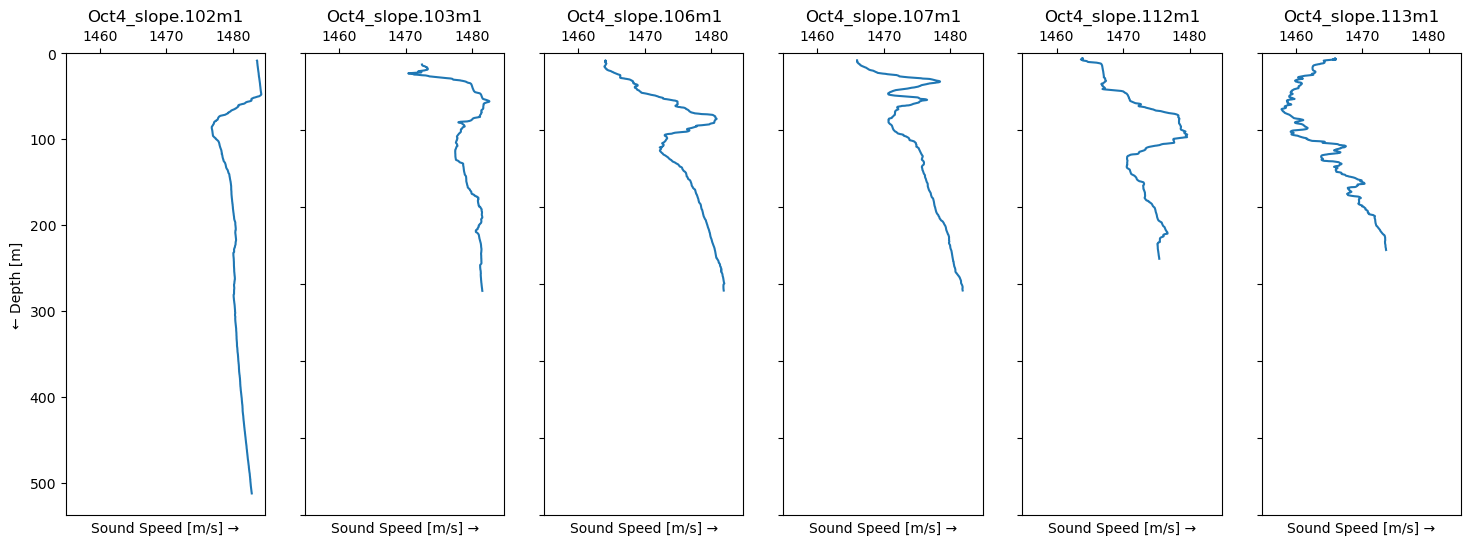

In [36]:
# Get a list of the files in the Data Directory - we use a brute force approach here and open any file with the .mvp
# extension - we get away with it because the only files with that extension are the ssp data files

data=Path('./Data/') # Get the path to your data folder
ls=list(data.glob('*.mvp')) # From your data folder get a list of mvp files

ana_ss = AnalyzeSS() # Create an AnalyzeSS for analysing the sound speed profiles
    
# Add the SSPs to ana_ss for processing
for f in ls:
    # Create a new SSP object for the current data file
    ssp=SSP()
    
    # Read the data file into the SSP
    ssp.read_mvp_file(str(f.resolve()))
    
    # Add the SSP to the AnalyzeSS object
    ana_ss.SSPs.append(ssp)
    
ana_ss.draw()

<img align="right" width="70%" style="padding-right:10px;" src="./Images/profiles.png">

___
## B5.1  Quantitative Analysis of the Profiles

In step B5.0 you created a draw method allowing you to look at all the profiles at the same time in consistent manner. You may use this to draw some conclusion about the profiles and the resulting differences in the measured depths. However, it would be nice to also calculate some properties and use this information to do some further analysis (again using graphs).

What we will do in our analysis is to assume that one of the profiles is the right profile - and calculate the proper TWTT to the sea-floor for an entire multi-beam sonar swath i.e., a range of depression angles $\theta$.

___
## B5.1.0 Create Swath

In our case we will create a swath based on an array of depression angles $\theta$. We will have the array consist of 20 beams extending from 20<sup>o</sup> to 160<sup>o</sup>.

We will have the sonar transducer located at a depth of 7m and the depth at a depth of 200m

We will define the profile contained in the file  'Oct4_slope.102m1.mvp' as the 'selected' profile, that is, we will calculate depths from TWTTs from this profile

In [37]:
th = np.linspace(20, 160, 20)*pi/180
tx_depth = 7
depth = 200

***
### B5.1.1 Add Method to SSP to Determine c at Given Depth

Add the method `determince_C` to the `SSP` class definition in `ssp.py`. Having the ability to determine the sound speed at any depth is an important feature for a class dealing with sound speed profiles. Do you think the operator at the ellipsis should be `>` or `>=`? The distinction here is immaterial as the resulting numeric value of the sound speed will be the same. However, only one answer is logically right. For other problems the distinction may be numerically significant, understanding which one to use is of great value for producing code that behaves predictably. Problems caused by logical errors such as these may be exceedingly difficult to diagnose

    # B5.1.1 Add Method to SSP to Determine c at Given Depth
    def determine_c( self, d_interest):
        c = self.proc_ss
        d = self.proc_depth
        g = self.g
        layer = sum( d_interest >= d) - 1
        ss = c[layer]+(d_interest-d[layer])*g[layer]
        return ss

***
### B5.1.2 Synthesize TWTTs for Given Depth

We define that the profiles are free of error for their given location and epoch, thus we may use them to determine true estimates of the TWTTs.

    def synthesize_twtt(self, th, tx_depth, depth):
        n_ssps = len(self.SSPs)
        n_beams = len(th)
        twtt = np.zeros((n_ssps,n_beams))
        cross_track_d = np.zeros((n_ssps,n_beams))
        for i in range(n_ssps):
            ss_start = self.SSPs[i].determine_c(tx_depth)
            for j in range(n_beams):
                twtt[i,j],cross_track_d[i,j],_,_= \
                    self.SSPs[i].determine_twtt(tx_depth, th[j], ss_start, depth)
                
        return twtt, cross_track_d

Add the method synthesize_twtt to the AnalyzeSS class for this purpose. Inspect the code carefully and convince yourself that you understand what it does:

c:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\mycode\ssp.py:291: RuntimeWarning: invalid value encountered in arccos
  th = arccos(c[0:] * ray_c)


Inversion Sound Speed: 1578.84
Inversion Sound Speed: 1670.61
Inversion Sound Speed: 1805.38
Inversion Sound Speed: 1999.72
Inversion Sound Speed: 2283.20
Inversion Sound Speed: 2712.54
Inversion Sound Speed: 3410.11
Inversion Sound Speed: 4695.03
Inversion Sound Speed: 7738.85
Inversion Sound Speed: 23088.74
Inversion Sound Speed: 23088.74
Inversion Sound Speed: 7738.85
Inversion Sound Speed: 4695.03
Inversion Sound Speed: 3410.11
Inversion Sound Speed: 2712.54
Inversion Sound Speed: 2283.20
Inversion Sound Speed: 1999.72
Inversion Sound Speed: 1805.38
Inversion Sound Speed: 1670.61
Inversion Sound Speed: 1578.84
Inversion Sound Speed: 1566.96
Inversion Sound Speed: 1658.05
Inversion Sound Speed: 1791.80
Inversion Sound Speed: 1984.68
Inversion Sound Speed: 2266.03
Inversion Sound Speed: 2692.14
Inversion Sound Speed: 3384.45
Inversion Sound Speed: 4659.72
Inversion Sound Speed: 7680.64
Inversion Sound Speed: 22915.06
Inversion Sound Speed: 22915.06
Inversion Sound Speed: 7680.64
Inve

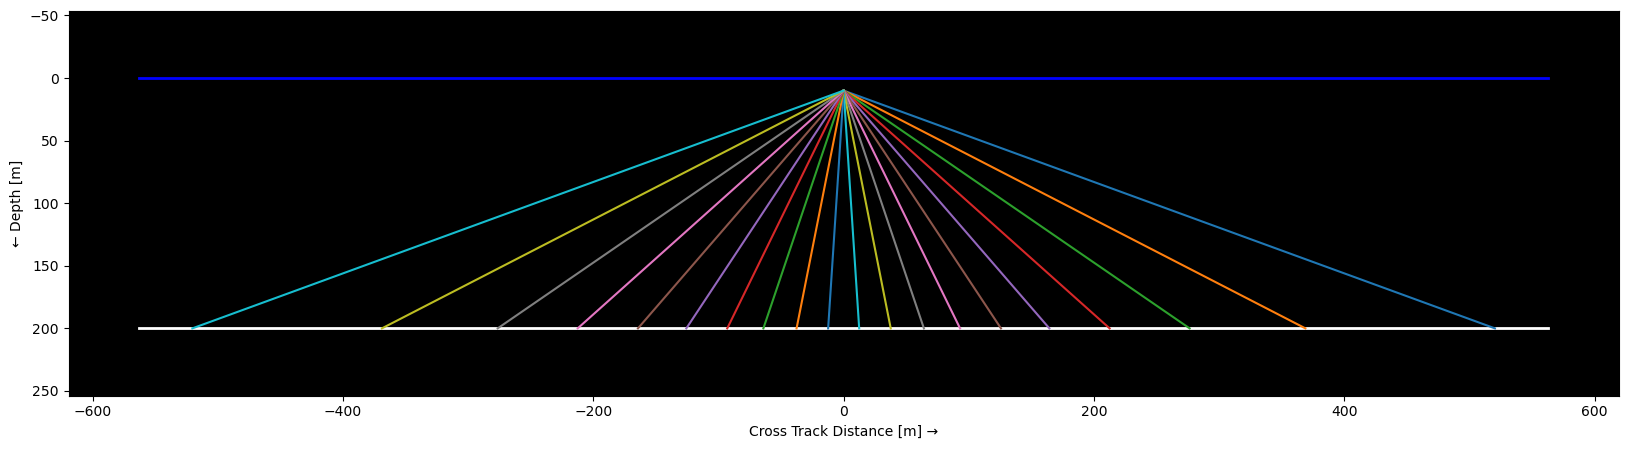

In [38]:
# Create Swath Function
# the following creates the matrices twtts and true_rad_dist
# on each row the twtt and cross track distance for each beam is held for a given profile

th = np.linspace(20, 160, 20)*pi/180
tx_depth = 7
depth = 200
twtts, true_rad_dist = ana_ss.synthesize_twtt(th,tx_depth,depth)

n_beams = len(th)
fig = plt.figure(figsize=(20, 5))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

# Plot the water surface
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(0,0),'b',linewidth=2)

# Plot the bottom in white 
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(depth,depth),'w',linewidth=2)

# Add the center of each beam for the first profile (as a straight line from the transducer to the bottom)

for i in range(n_beams):
    plt.plot((0,true_rad_dist[0,i]),(d_start,depth))

ax.invert_yaxis()
ax.axis('equal')
plt.xlabel('Cross Track Distance [m] →')
plt.ylabel('← Depth [m]')

plt.show()


<img align="right" width="70%" style="padding-right:10px;" src="./Images/beams.png">

***
### B5.1.3 Select a Profile for Generating Depths from TWTTs

We will want to compare the results of the ray tracing with other profiles. For this it is useful to have a `select_ssp` method be part of the `AnalyzeSS` class; allowing us to select a profile by its filename:

    def select_ssp(self, file_name):
        for i, ssp in enumerate(self.SSPs):
            if os.path.basename(ssp.metadata['name']) == file_name:
                return ssp, i
            i += 1
        return 'Not found'

Note that I used `enumerate` in the `for` loop - have a close look at the code to see whether you understand it. 

In [49]:
th = np.linspace(20, 160, 20)*pi/180
tx_depth = 10
depth = 200
twtts, true_rad_dist = ana_ss.synthesize_twtt(th,tx_depth,depth)
ssp_name = 'Oct4_slope.102m1.mvp'
ssp_select, n_select = ana_ss.select_ssp(ssp_name)
c_start = ssp_select.determine_c(d_start)

n_ssps =  len(ana_ss.SSPs)
n_beams = len(th)
model_depth = np.zeros((n_ssps,n_beams))
model_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ssp_select.determine_c(tx_depth)
    for j in range(n_beams):
        model_depth[i,j],model_rad_dist[i,j],_,_= ssp_select.ray_trace_twtt(tx_depth, th[j], ss_start, twtts[i,j])

print( model_depth)
print( twtts)

[[200.0000648  200.00002087 200.00008642 200.00010249 200.00029476
  199.99979943 200.00024027 200.00057666 199.99973957 200.00297724
  200.00297724 199.99973957 199.99979476 200.00024027 200.00010059
  200.00004127 200.00010249 200.00008642 200.00002087 200.0000648 ]
 [209.98323701 204.91846266 202.80456233 201.7095008  201.11374025
  200.70999236 200.46714534 200.33037065 200.22572354 200.1786088
  200.17992093 200.22572354 200.32646117 200.46714534 200.70517382
  201.11475422 201.7095008  202.8019566  204.91846266 209.98060767]
 [214.82544778 207.44191828 204.44926443 202.92698546 202.07534918
  201.54004647 201.20186895 201.01038469 200.86083857 200.79297724
  200.79810407 200.86083857 201.01038469 201.20186895 201.53854068
  202.07940504 202.92698546 204.44605737 207.44191828 214.82264315]
 [212.71801232 206.49902998 203.9334075  202.62325671 201.88764602
  201.41196623 201.12606665 200.95695512 200.83033688 200.77759674
  200.77759674 200.83033688 200.9551307  201.12606665 201.41

    [[212.7183629  206.49902998 203.93320706 202.6243668  201.88789951
      201.41472069 201.12606665 200.95695512 200.82861848 200.77759674
      200.77246991 200.82861848 200.95408817 201.12606665 201.41031355
      201.88916697 202.6243668  203.92961934 206.49902998 212.71801232]
     [204.85164241 203.46227337 202.87597697 202.56597609 202.40527662
      202.27553674 202.21507198 202.18943815 202.13097983 202.111522
      202.111522   202.13097983 202.18735309 202.21507198 202.27493442
      202.40451615 202.56597609 202.87428359 203.46227337 204.84778604]
     ...

***
### B5.1.4 Selecting the Results for the correct Profile

In the code above we determined depths using the TWTT associated to all profiles, including the selected profile. This means that for the selected profile we expect the errors to be zero - let's check this.

Note that I again used `enumerate` in the `for` loop - have another look at this code to see whether you understand how it is used here. 

In [46]:
th = np.linspace(20, 160, 20)*pi/180
tx_depth = 10
depth = 200
twtts, true_rad_dist = ana_ss.synthesize_twtt(th,tx_depth,depth)
print(true_rad_dist)
ssp_name = 'Oct4_slope.102m1.mvp'
ssp_select, n_select = ana_ss.select_ssp(ssp_name)
c_start = ssp_select.determine_c(d_start)

n_ssps =  len(ana_ss.SSPs)
n_beams = len(th)
model_depth = np.zeros((n_ssps,n_beams))
model_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ssp_select.determine_c(tx_depth)
    for j in range(n_beams):
        model_depth[i,j],model_rad_dist[i,j],_,_= ssp_select.ray_trace_twtt(tx_depth, th[j], ss_start, twtts[i,j])


depth_errors = model_depth - depth
rad_dist_errors = model_rad_dist - true_rad_dist[n_select,]

print(ssp_select.metadata['name'])
print('Beam Nr   Depth error  Crosstrack error' )
for b, d in enumerate( depth_errors[n_select]):
    print('%4d     % .3fm       % .3fm'%(b, d, rad_dist_errors[n_select, b]))

c:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\mycode\ssp.py:291: RuntimeWarning: invalid value encountered in arccos
  th = arccos(c[0:] * ray_c)


[[ 512.07022846  363.12256099  272.11217154  209.18415601  161.79722872
   123.73308819   91.55888338   63.11987292   37.03767724   12.20043913
   -12.20556597  -37.03767724  -63.12925567  -91.55888338 -123.73549746
  -161.79697523 -209.18437803 -272.11096889 -363.12265373 -512.08039525]
 [ 541.97958762  374.58678462  277.64482109  212.23786008  163.62615992
   124.89053253   92.29114031   63.58050653   37.27620816   12.29786148
   -12.26987657  -37.27620816  -63.58154119  -92.29114031 -124.88873921
  -163.6251536  -212.23808042 -277.64661146 -374.58687666 -541.97619526]
 [ 554.67236287  379.12311133  279.77289383  213.3951819   164.31324715
   125.31910977   92.5590955    63.74833286   37.36533833   12.30250432
   -12.31262286  -37.36533833  -63.75090484  -92.5590955  -125.32000134
  -164.31374745 -213.3951819  -279.77309163 -379.12311133 -554.67270883]
 [ 548.35449767  376.91453605  278.74353902  212.84145681  163.98349799
   125.11135637   92.43372772   63.67400197   37.3231997    1

c:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\mycode\ssp.py:208: RuntimeWarning: invalid value encountered in arccos
  th = arccos(c[0:] * ray_c)


Oct4_slope.102m1.mvp
Beam Nr   Depth error  Crosstrack error
   0      0.000m       -0.000m
   1      0.000m        0.000m
   2      0.000m        0.000m
   3      0.000m        0.000m
   4      0.000m        0.000m
   5     -0.000m       -0.000m
   6      0.000m        0.000m
   7      0.001m        0.000m
   8     -0.000m        0.000m
   9      0.003m        0.000m
  10      0.003m        0.000m
  11     -0.000m        0.000m
  12     -0.000m        0.000m
  13      0.000m        0.000m
  14      0.000m        0.000m
  15      0.000m        0.000m
  16      0.000m       -0.000m
  17      0.000m       -0.000m
  18      0.000m       -0.000m
  19      0.000m        0.000m


    Oct4_slope.102m1.mvp
    Beam Nr   Depth error  Crosstrack error
       0      0.000m       -0.000m
       1      0.000m        0.000m
       2      0.000m       -0.000m
       3      0.000m        0.000m
       4      0.000m        0.000m
       5      0.000m        0.000m
       6      0.000m        0.000m
       7     -0.000m       -0.001m
       8     -0.000m        0.000m
       9      0.003m        0.000m
      10     -0.002m        0.000m
      11     -0.000m        0.000m
      12     -0.000m        0.001m
      13      0.000m        0.000m
      14      0.000m        0.000m
      15      0.000m        0.000m
      16      0.000m       -0.000m
      17      0.000m        0.000m
      18      0.000m       -0.000m
      19     -0.000m        0.000m


***
### B5.1.5 Comparing the Results to a Standard 

Rather than visualize inspecting the difference we can do it automatically. Here we will set a standard named `tolerance`. If the results differ by more than the tolerance, we will deem them to not match. However, you should ask yourself what a reasonable tolerance is. In the code cell below the tolerance is, rather arbitrarily, set to 1mm 

Note that we expect the results to match - the differences are purely a measure of how numerically well our methods fare. If we would see significant differences it would be time to rethink the approach.

In [50]:
th = np.linspace(20, 160, 20)*pi/180
tx_depth = 10
depth = 200
twtts, true_rad_dist = ana_ss.synthesize_twtt(th,tx_depth,depth)
ssp_name = 'Oct4_slope.102m1.mvp'
ssp_select, n_select = ana_ss.select_ssp(ssp_name)
c_start = ssp_select.determine_c(d_start)

n_ssps =  len(ana_ss.SSPs)
n_beams = len(th)
model_depth = np.zeros((n_ssps,n_beams))
model_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ssp_select.determine_c(tx_depth)
    for j in range(n_beams):
        model_depth[i,j],model_rad_dist[i,j],_,_= ssp_select.ray_trace_twtt(tx_depth, th[j], ss_start, twtts[i,j])


depth_errors = model_depth - depth
rad_dist_errors = model_rad_dist - true_rad_dist[n_select,]

tolerance = 10**-3   # If the results differ by less than 1mm we will assign them to be a match

# Test the results from the depths
if any(abs(depth_errors[n_select,])>tolerance):
    print("Results do not match!")
else:
    print( "Results match")

Results do not match!


    Results do not match!

***
### B5.1.6 Comparing the Selected Profile with All Other Profiles

It is perhaps more interesting to compare the results of the ray tracing with other profiles i.e., what does the bottom look like if we use the selected profile, instead of the appropriate profile for the locations at which the profiles are obtained. In the plot below you see the resulting bottom for all the profiles. Off-course there is one set of bottom locations that do not show error (plotted in white), this is for the case where we are comparing the results for the selected profile against itself.

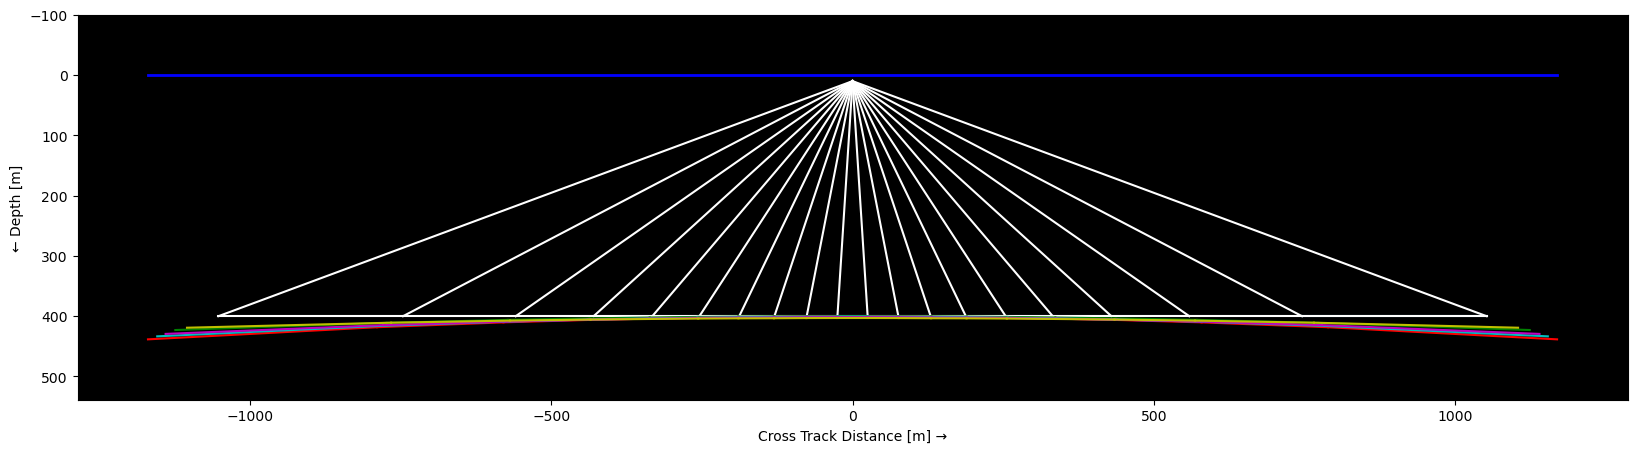

In [51]:
th = np.linspace(20, 160, 20)*pi/180
tx_depth = 10
depth = 400
twtts, true_rad_dist = ana_ss.synthesize_twtt(th,tx_depth,depth)
ssp_name = 'Oct4_slope.102m1.mvp'
ssp_select, n_select = ana_ss.select_ssp(ssp_name)
c_start = ssp_select.determine_c(d_start)

n_ssps =  len(ana_ss.SSPs)
n_beams = len(th)
model_depth = np.zeros((n_ssps,n_beams))
model_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ssp_select.determine_c(tx_depth)
    for j in range(n_beams):
        model_depth[i,j],model_rad_dist[i,j],_,_= ssp_select.ray_trace_twtt(tx_depth, th[j], ss_start, twtts[i,j])


depth_errors = model_depth - depth
rad_dist_errors = model_rad_dist - true_rad_dist[n_select,]

fig = plt.figure(figsize=(20, 5))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

# Plot the water surface
plt.plot((np.min(true_rad_dist),np.max(true_rad_dist)),(0,0),'b',linewidth=2)

# Plot all the beams and bottom segments for the selected profile
for j in range(n_beams):
    plt.plot((0,true_rad_dist[n_select,j]),(d_start,model_depth[n_select,j]),'w')

plt.plot((true_rad_dist[n_select,0],true_rad_dist[n_select,1]), \
             (model_depth[n_select,0],model_depth[n_select,1]))

# Create a list of colors

colors = ('b','g','r','c','m','y')

for i in range(n_ssps):
    if i == n_select:
        color = 'w'
    else:
        color = colors[i%6]
    for j in range(n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (model_depth[i,j],model_depth[i,j+1]),color)


ax.invert_yaxis()
ax.axis('equal')
plt.xlabel('Cross Track Distance [m] →')
plt.ylabel('← Depth [m]');

<img align="right" width="70%" style="padding-right:10px;" src="./Images/frowns.png">

***
### B5.1.7 Plotting the Errors

The code in the cell above creates a plot of how the flat seafloor would show up if we used an inappropriate sound speed profile to determine depths from observed TWTTs. It becomes clear that there is error associated to using the wrong profile, but hard to judge what the error is.

The importance of seeing the above figure is that when you are collecting data in the field, and you see data that is consistently 'smiling' or 'frowning' that there is a good chance that you are using an inappropriate sound speed profile for the time and place of the survey. In the case where you have an MVP you simply make another cast. Otherwise, you will have to judge the level of error vs the standard that you are working to, to decide to bring the vessel to a halt and take a sound speed cast.

If we have better profiles available to us, it is worthwhile evaluating what the level of error that we are inducing is. For this it is useful to compare the results of the selected profile directly to the results for the more appropriate profiles by specifically plotting the errors. The code cell given below does exactly that:

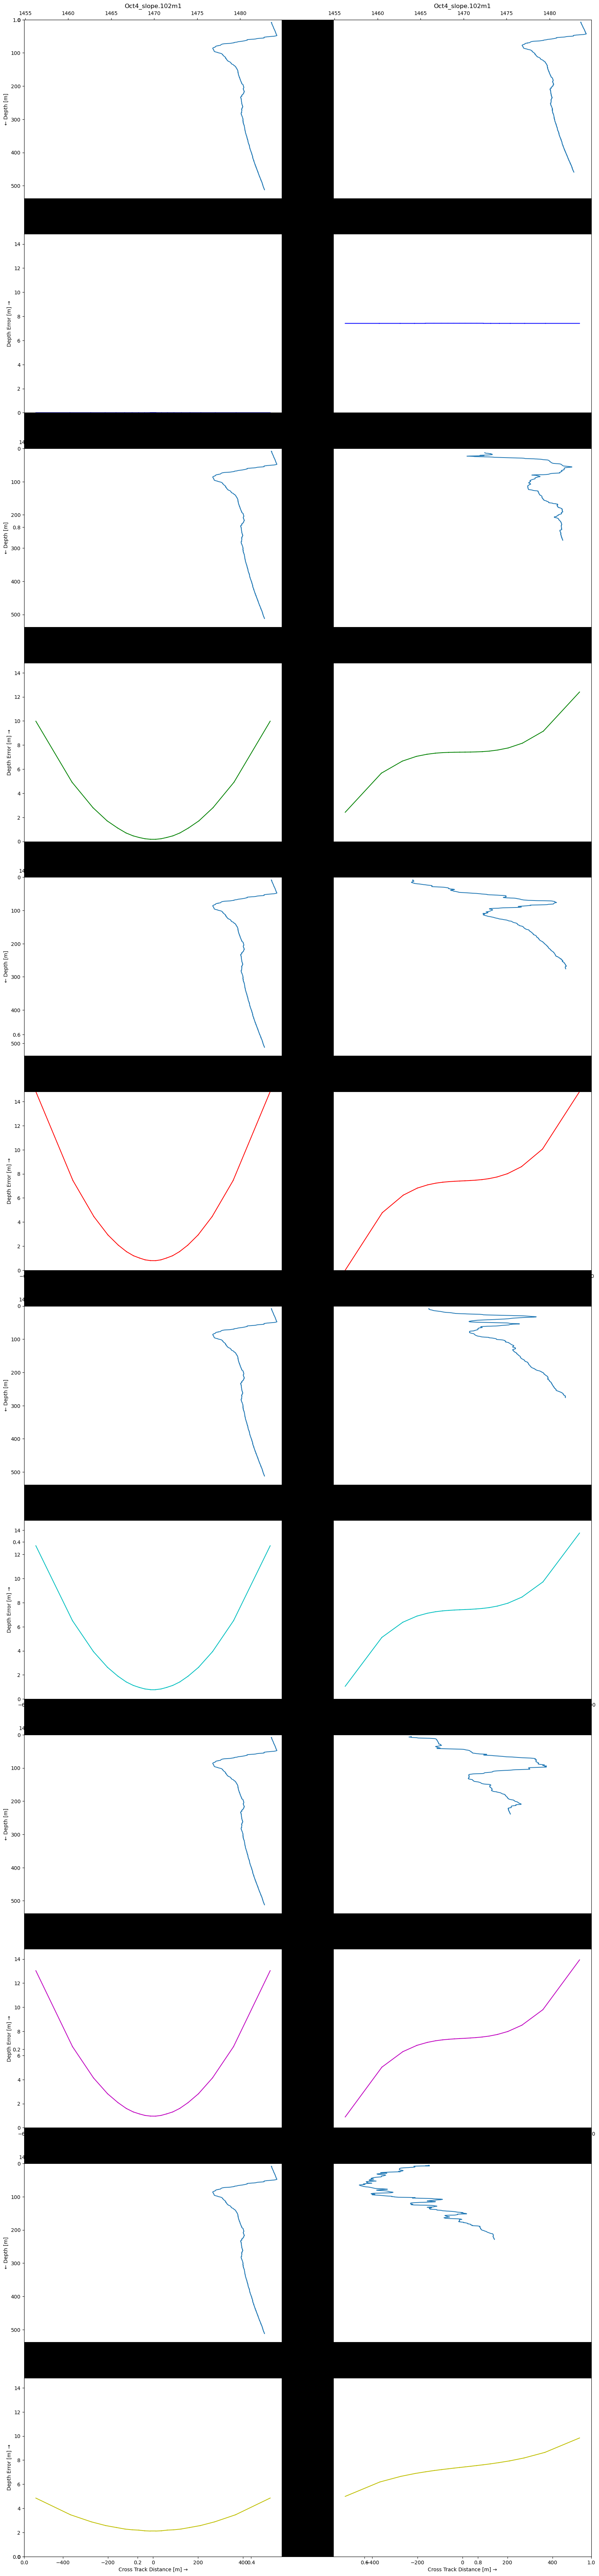

In [52]:
th = np.linspace(20, 160, 20)*pi/180
tx_depth = 10
depth = 200
twtts, true_rad_dist = ana_ss.synthesize_twtt(th,tx_depth,depth)
ssp_name = 'Oct4_slope.102m1.mvp'
ssp_select, n_select = ana_ss.select_ssp(ssp_name)
c_start = ssp_select.determine_c(d_start)

n_ssps =  len(ana_ss.SSPs)
n_beams = len(th)
model_depth = np.zeros((n_ssps,n_beams))
model_rad_dist = np.zeros((n_ssps,n_beams))
for i in range(n_ssps):
    ss_start = ssp_select.determine_c(tx_depth)
    for j in range(n_beams):
        model_depth[i,j],model_rad_dist[i,j],_,_= ssp_select.ray_trace_twtt(tx_depth, th[j], ss_start, twtts[i,j])

depth_errors = model_depth - depth
rad_dist_errors = model_rad_dist - true_rad_dist[n_select,]

fig = plt.figure(figsize=(20, 15*n_ssps))  # Create a 20*5 plot area
ax = plt.gca()                     # Get the current axes
ax.set_facecolor((0, 0, 0))        # Set the background color of the plot area to black

min_ss = 10000
max_ss = 0
max_dep = 0

# Update the depth and sound speed ranges
for i in range(n_ssps):
    if ana_ss.SSPs[i].proc_depth[-2] > max_dep:
        max_dep = ana_ss.SSPs[i].proc_depth[-2]
    if min(ana_ss.SSPs[i].proc_ss[0:-1]) < min_ss:
        min_ss = min(ana_ss.SSPs[i].proc_ss[0:-2])
    elif max(ana_ss.SSPs[i].proc_ss) > max_ss:
        max_ss = max(ana_ss.SSPs[i].proc_ss[0:-2])
        
# Set the rannges as tuples
dep_range = (0, max_dep+max_dep/20)
ss_range = (min_ss-3,max_ss+3)


for i in range(0,n_ssps):
    ax = plt.subplot(n_ssps*2,2,(i)*4+1)
    ana_ss.SSPs[n_select].draw(False, ax, dep_range, ss_range, True)
    ax = plt.subplot(n_ssps*2,2,(i)*4+2)
    ana_ss.SSPs[i].draw(False, ax, dep_range, ss_range, False)
    ax = plt.subplot(n_ssps*2,2,(i)*4+3)
    plt.xlabel('Cross Track Distance [m] →')
    plt.ylabel('Depth Error [m] →')
    ax.title.set_text('Depth Error')
    color = colors[i%6]
    for j in range (n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (depth_errors[i,j],depth_errors[i,j+1]),color)
    plt.ylim((np.min(depth_errors),np.max(depth_errors)))
    
    ax = plt.subplot(n_ssps*2,2,(i)*4+4)
    plt.xlabel('Cross Track Distance [m] →')
    plt.ylabel('Cross Track Error [m] →')
    ax.title.set_text('Cross Track Error')
    for j in range (n_beams-1):
        plt.plot((true_rad_dist[i,j],true_rad_dist[i,j+1]), \
             (rad_dist_errors[i,j],rad_dist_errors[i,j+1]),color)
    plt.ylim((np.min(rad_dist_errors),np.max(rad_dist_errors)))
    

In [44]:
hor_acc = 5 + depth * 0.05
ver_acc = np.sqrt(.5**2+(0.013*depth)**2)

print(hor_acc, ver_acc)

big = 0
for i in range(0,n_ssps):
    print(ana_ss.SSPs[i].metadata['Source File'])
    for j in range (n_beams-1):
#         print(true_rad_dist[i,j],depth_errors[i,j])
        if depth_errors[i,j] < ver_acc:
            print("Depth error in spec up to: %.0f m"%true_rad_dist[i,j])
            break
    for j in range (n_beams-1):
        if rad_dist_errors[i,j] < hor_acc:
            print("Cross track in spec up to: %.0f m\n"%true_rad_dist[i,j])
            break
            

15.0 2.6476404589747453
C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.102m1.mvp
Depth error in spec up to: 512 m
Cross track in spec up to: 512 m

C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.103m1.mvp
Depth error in spec up to: 212 m
Cross track in spec up to: 375 m

C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.106m1.mvp
Depth error in spec up to: 164 m
Cross track in spec up to: 379 m

C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.107m1.mvp
Depth error in spec up to: 213 m
Cross track in spec up to: 377 m

C:\Users\lfreguete\Documents\UNH\INTEGRATED SEABED MAPPING SYSTEMS\ASSIGNMENTS\LAB\ESCI_872_Public\Data\Oct4_slope.112m1.mvp
Depth error in spec up to: 164 m
Cross track in spec up to: 377 m

C:\Users\lfregue

Note the plots below are for a ***different*** selected profile than the one selected in the code cell!!

<img align="right" width="70%" style="padding-right:10px;" src="./Images/refraction_errors.png">

## ___
<br>

<img align="left" width="6%" style="padding-right:10px;" src="./Images/test.png">

# Essay Questions

<br>
Answer the questions below in essay form. Keep the answers short and concise!

    1. Use the results from B5.1.7 to comment on whether the induced errors are 
       significant compared to IHO Order 1 required horizontal or vertical accuracies. 
       Note whether/how this compliance changes as a function of beam depression
       angle.
       
    2. Why are the four following data fields useful for analysis of the sound 
       speed profiles? 
        1.Launch Location
        2.Time of launch
        3.Speed of vessel at launch
        4.Depth at launch location
    
    3. Why are the duplicate records removed in reverse order in step B3.10?
    
    4. We extended the profiles upwards to the surface in step B3.12 assuming 
       that the water near the surface is well mixed. Would this give a problem 
       on a calm and hot sunny afternoon? Explain your answer using the 
       word 'gradient' 

    5. in B3.15 we replaced the zero values in the array self.g using the Boolean 
       vector `self.g == 0` in the expression self.g[self.g == 0] =  10**-9. Explain 
       in your own words what this expression does.
       
    6. Unless you have adapted your code to deal with ray reversal you would have 
       received a warning when determining the depression angles 𝜃𝑖 in step 
       B4.0.5 Assuming that you loaded the data contained in the file     
       'Oct4_slope.112m1.mvp' into an SSP object 'ssp' and called the method as follows 
       'ssp.ray_trace_twtt(d_start,20*pi/180,1464.5,0.2)'
           a. What is the sound speed at which this occurs?
           b. From which layer does the warning originate? How can you know?
           c. At what depth in this layer does the ray reversal occur i.e., does it go 
              from going downward to upward?
           d. Given the location of the survey do you think a ray reversal can occur in 
              reality for this signal? 

     7. In B5.1.5 we looked at row `n_select` and found that some errors 
        were at the mm level. Do you think this is a significant error? In your answer
        contemplate what a depth error a sound speed error of .1 m/s would lead to for 
        200m depths at nadir - For this you may assume that the sound speed is 
        isotropic and 1500 m/s. 
        Use the reported 'Velocity Accuracy` for the Teledyne Marine Digibar Pro to
        illustrate how likely this level of observation error is to occur.
        Finally, determine the level of significance of the depth errors 
        (km,hm,m,dm,cm,mm) by adjusting the `tolerance` parameter.
        
    8.  Using the plot of B5.1.7. (depths of 200m) what do you think will lead to a 
        generally greater improvement in positioning of bathymetry data, taking more 
        sound speed casts (coming at the cost of wear and tear on the MVP)or paying 
        for a GNSS augmentation service? To answer this question you may assume 
        that unaided GNSS (known as single point positioning) has an uncertainty of 
        approx 10m, whereas augmented GNSS can get you to cm level uncertainty.

     9. Would your answer to question 8. change for very shallow water? D
     
    10. In B5.1.7 the errors shown are associated to a different profile than the one 
        used in the sample code. Which profile did I use and how do you know?

     Note that you are encouraged to investigate scenarios by changing the parameters in 
     this Notebook, just make sure that you can revert back to the original.        
        
     
     



<img align="left" width="6%" style="padding-right:10px; padding-top:10px;" src="./Images/refs.png">

## Useful References

* [The official Python 3.9 documentation](https://docs.python.org/3.6/index.html)
  * [Classes](https://docs.python.org/3.9/tutorial/classes.html)
  * [String Representation Method](https://docs.python.org/3.9/reference/datamodel.html?highlight=repr#object.__str__)
* [Memory address](https://en.wikipedia.org/wiki/Memory_address)
* [ePOM: Programming Basics with Python](https://github.com/hydroffice/python_basics)
* [ePOM: Foundations of Ocean Data Science](https://github.com/hydroffice/ocean_data_science)
* [Tools for Ocean Mapping](https://github.com/semmed/ESCI_872_Public)
* [NMEA-0183](https://gpsd.gitlab.io/gpsd/NMEA.html)


<img align="left" width="5%" style="padding-right:10px;" src="./Images/email.png">

*For issues or suggestions related to this notebook that should not be addressed on Teams, write to: semmed@ccom.unh.edu*

Lab B Created by John E. Hughes Clarke<br>
Python code and Jupyter Notebook implementation by Semme J. Dijkstra